## Подготовка к анализу

Загружаем необходимые библиотеки, настраиваем формат визуализации и создаем класс цветов для более удобного отображения текста во время работы

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import datetime
import seaborn as sns
sns.set_palette('muted')
sns.set_color_codes('muted')
sns.set_style('white')

import warnings
warnings.filterwarnings('ignore')

from statsmodels.graphics.mosaicplot import mosaic
from sklearn.decomposition import PCA

In [2]:
pip install openpyxl


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install factor_analyzer


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install yellowbrick


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# for PCA
from sklearn.decomposition import PCA as skPCA
from sklearn.preprocessing import StandardScaler
from factor_analyzer.factor_analyzer import calculate_kmo # KMO-test
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

from sklearn.cluster import KMeans

# for hierarchical cluster analysis
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from yellowbrick.cluster import KElbowVisualizer

In [6]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [7]:
%config InlineBackend.figure_format = 'retina'

## 1. Dataset Loading and basic preprocessing

   **About dataset**

* `Hid` - human_id, зашифрованный персональный идентификатор пользователя компаний
* `has_company_id` - наличие зарегистрированного аккаунта в компании
* `company_gmv_total` - суммарный **gmv** пользователя в сервисе
* `company_gvm_order_count` - количество успешных заказов пользователя в сервисе
* `company_activity_count` - количество активных действий пользователя в сервисе
* `company_android` - установленное у пользователя приложение компании на платформе **android**
* `company_apple` - установленное у пользователя приложение компании на платформе **Apple**
* `company _web` - установленное у пользователя приложение компании на **ПК**
* `is_msk` - территориальное расположение в Москве

Выгружаем данные и смотрим базовую информацию о датасете. Все переменные имеют `object` Dtype (но по описанию должны иметь integer или float тип). Кроме, в данных только 1 null value, находящийся в Blue_gmv_total колонке. Видим, что для каждой компании отсутствует ряд информации (к примеру мы не можем посмотреть колонки `company_gmv_total`, `company_gvm_order_count`, `company_activity_count` для Red Company

In [8]:
df_vk = pd.read_excel('Analytic_test.xlsx')
df_vk.columns = df_vk.iloc[0]
df_vk = df_vk.iloc[1:, 1:]
df_vk

,HID,active_Red,has_Green_id,has_Black_id,has_Blue_id,Blue_activity_count,Blue_gmv_total,Green_gvm_total,Green_gvm_order_count,Black_gvm_total,...,Blue_android,Red_apple,Green_apple,Black_apple,Blue_apple,is_msk,Red_web,Green_web,Black_web,Blue_web
1,00003c7fb5e57ce673f1801f3679f5c25,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00006b602533083e3bebfcbff08613931,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0000736c3f76339196cb1cc759b8363b,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00009bdcc5307b38efde8690b8bd658e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0000bc3186b7b31d9b35d3fbbb250b9f8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,32555ec33d762588db3253b063525f03b58f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
99997,3255600b525b2598b37775fb3b25b3397bbb,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
99998,325563dbbb35c393be38c5c79373ed180,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99999,3255650825570bcc93bc9b076b0bfbb25e6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [9]:
df_vk.describe()

,HID,active_Red,has_Green_id,has_Black_id,has_Blue_id,Blue_activity_count,Blue_gmv_total,Green_gvm_total,Green_gvm_order_count,Black_gvm_total,...,Blue_android,Red_apple,Green_apple,Black_apple,Blue_apple,is_msk,Red_web,Green_web,Black_web,Blue_web
count,100000,100000,100000,100000,100000,100000,99999,100000,100000,100000,...,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000
unique,100000,2,3,3,5,69,243,683,71,913,...,2,2,2,2,2,2,2,2,2,2
top,00003c7fb5e57ce673f1801f3679f5c25,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
freq,1,55874,99114,98921,86734,96112,99548,99114,99114,98921,...,91953,89126,99384,98218,95354,88079,67108,99802,98539,89360


In [10]:
df_vk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 1 to 100000
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   HID                    100000 non-null  object
 1   active_Red             100000 non-null  object
 2   has_Green_id           100000 non-null  object
 3   has_Black_id           100000 non-null  object
 4   has_Blue_id            100000 non-null  object
 5   Blue_activity_count    100000 non-null  object
 6   Blue_gmv_total         99999 non-null   object
 7   Green_gvm_total        100000 non-null  object
 8   Green_gvm_order_count  100000 non-null  object
 9   Black_gvm_total        100000 non-null  object
 10  Black_gvm_order_count  100000 non-null  object
 11  Red_android            100000 non-null  object
 12  Green_android          100000 non-null  object
 13  Black_android          100000 non-null  object
 14  Blue_android           100000 non-null  object
 15  

Аббревиатура gmv (**Gross Merchandise Value**) используется неверно для большенства колонок, меняю их названия. Создаю лист с именами колонок для более удобного взаимодействия с датасетом

In [11]:
df_vk.rename(columns = {'Green_gvm_total':'Green_gmv_total'},inplace = True)
df_vk.rename(columns = {'Green_gvm_order_count':'Green_gmv_order_count'},inplace = True)
df_vk.rename(columns = {'Black_gvm_total':'Black_gmv_total'},inplace = True)
df_vk.rename(columns = {'Black_gvm_order_count':'Black_gmv_order_count'},inplace = True)

cols = df_vk.columns.to_list()
cols

['HID',
 'active_Red',
 'has_Green_id',
 'has_Black_id',
 'has_Blue_id',
 'Blue_activity_count',
 'Blue_gmv_total',
 'Green_gmv_total',
 'Green_gmv_order_count',
 'Black_gmv_total',
 'Black_gmv_order_count',
 'Red_android',
 'Green_android',
 'Black_android',
 'Blue_android',
 'Red_apple',
 'Green_apple',
 'Black_apple',
 'Blue_apple',
 'is_msk',
 'Red_web',
 'Green_web',
 'Black_web',
 'Blue_web']

Смотрим на уникальные данные в каждой колонке. Видим, что **active_Red** является `has_Red_id` колонкой, так как это колонка с бинарными данными, а для **Red Company** отсутствуют только continuous данные (`company_gmv_total`, `company_gvm_order_count`, `company_activity_count`). Также, мы видим наличие странных значений в колонках `has_Company_id` для других компаний. Переменная отображает наличие зарегистрированного аккаунта в компании, но мы видим значения 2.0, 3.0, 4.0. Также мы видим данные в неверном формате (например: '0.0' в Blue_gmv_total).Также, мы видим аутлаеры в некоторых колонках (datetime.datetime(2019, 5, 4, 0, 0))

In [12]:
for column in cols:
    print(column)
    print(df_vk[column].unique())
    print()

HID
['00003c7fb5e57ce673f1801f3679f5c25' '00006b602533083e3bebfcbff08613931'
 '0000736c3f76339196cb1cc759b8363b' ...
 '325563dbbb35c393be38c5c79373ed180' '3255650825570bcc93bc9b076b0bfbb25e6'
 '325566ec18c0db59083f5f6bb1b5f93d5']

active_Red
['0.0' '1.0']

has_Green_id
['0.0' '1.0' '2.0']

has_Black_id
['0.0' '1.0' '2.0']

has_Blue_id
['1.0' '0.0' '2.0' '3.0' '4.0']

Blue_activity_count
['2.0' '0.0' '1.0' '17.0' '13.0' '5.0' '6.0' '26.0' '8.0' '4.0' '27.0'
 '19.0' '12.0' '9.0' '3.0' '20.0' '10.0' '23.0' '7.0' '16.0' '14.0' '15.0'
 '53.0' datetime.datetime(2019, 5, 4, 0, 0) '32.0' '11.0' '18.0' '24.0'
 '119.0' '49.0' '39.0' '21.0' datetime.datetime(2019, 5, 7, 0, 0) '35.0'
 '72.0' '30.0' '71.0' '28.0' '42.0' '34.0' '41.0' '22.0' '29.0' '36.0'
 '90.0' '40.0' '43.0' datetime.datetime(2019, 5, 1, 0, 0) '51.0' '44.0'
 '25.0' '31.0' '45.0' '67.0' '33.0' '101.0' '74.0' '46.0' '111.0' '66.0'
 '38.0' '63.0' '100.0' '237.0' '59.0' datetime.datetime(2019, 5, 3, 0, 0)
 datetime.datetime(2019, 5, 6

In [13]:
df_vk.rename(columns = {'active_Red':'has_Red_id'},inplace = True)

## 2. Cleaning and Basic Visualization

Начнем чистку с непонятных значений в has колонках. Сделаем отдельный лист таких переменных и создадим цикл, где будет выводиться статистика об этих колонках.

Видим что аномальных значений очень мало (и они отсутствуют в has_Red_id колонке). Сразу подмечаем, что **Red Company** имеет в несколько раз больше зарегистрированных пользователей чем остальные компании вместе взятые.

In [14]:
has_list = df_vk.loc[:,df_vk.columns.str.startswith('has')].columns.to_list()
has_list

['has_Red_id', 'has_Green_id', 'has_Black_id', 'has_Blue_id']

has_Red_id


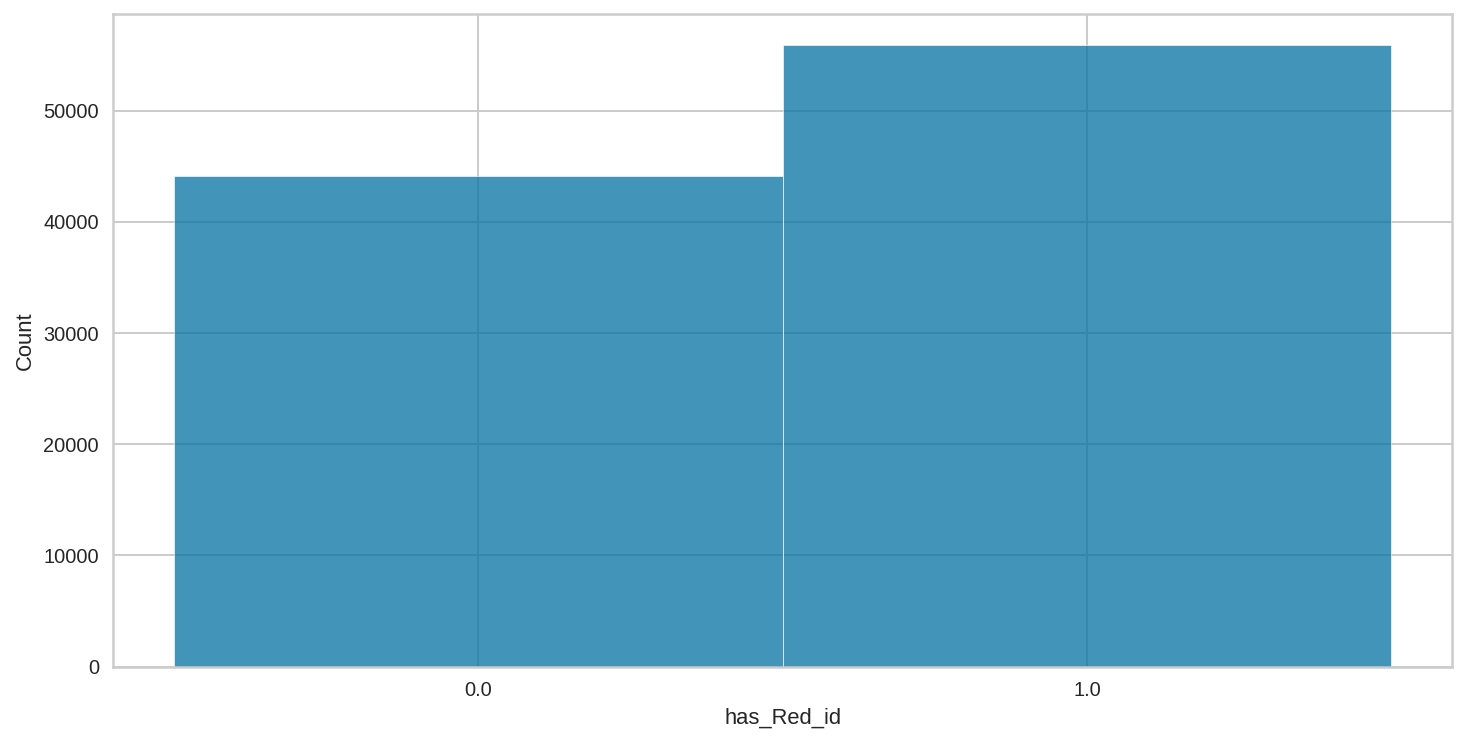

Value Occurence(%)
1.0    0.55874
0.0    0.44126
Name: has_Red_id, dtype: float64

has_Green_id


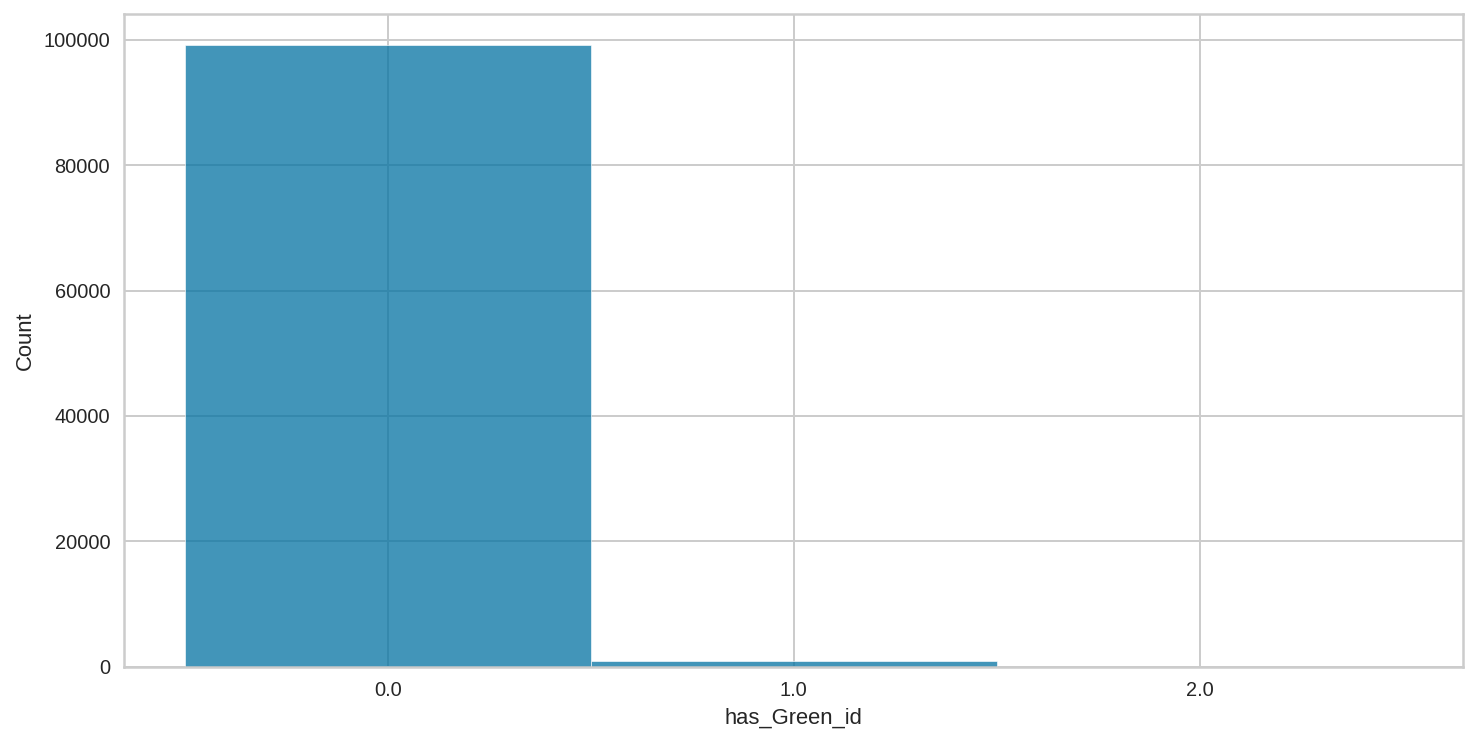

Value Occurence(%)
0.0    0.99114
1.0    0.00882
2.0    0.00004
Name: has_Green_id, dtype: float64

has_Black_id


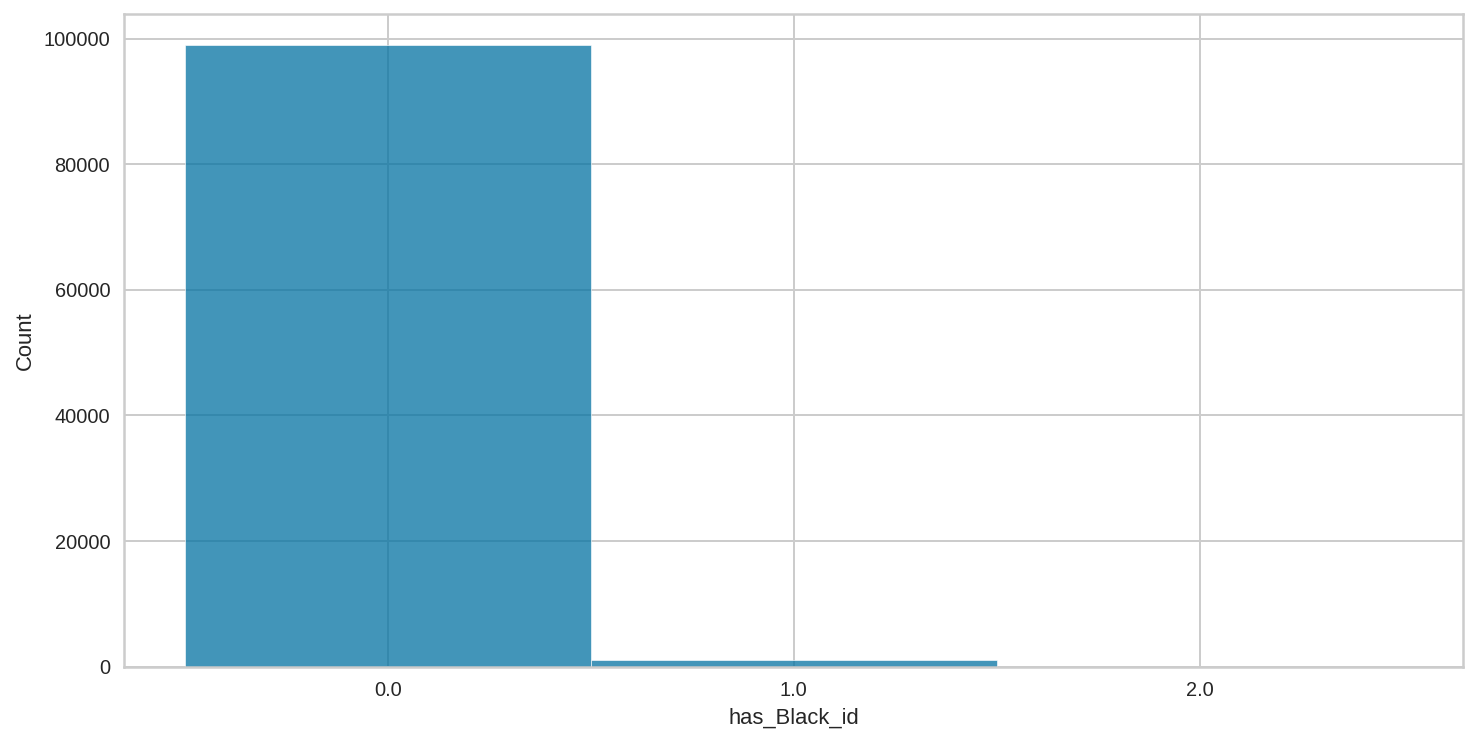

Value Occurence(%)
0.0    0.98921
1.0    0.01074
2.0    0.00005
Name: has_Black_id, dtype: float64

has_Blue_id


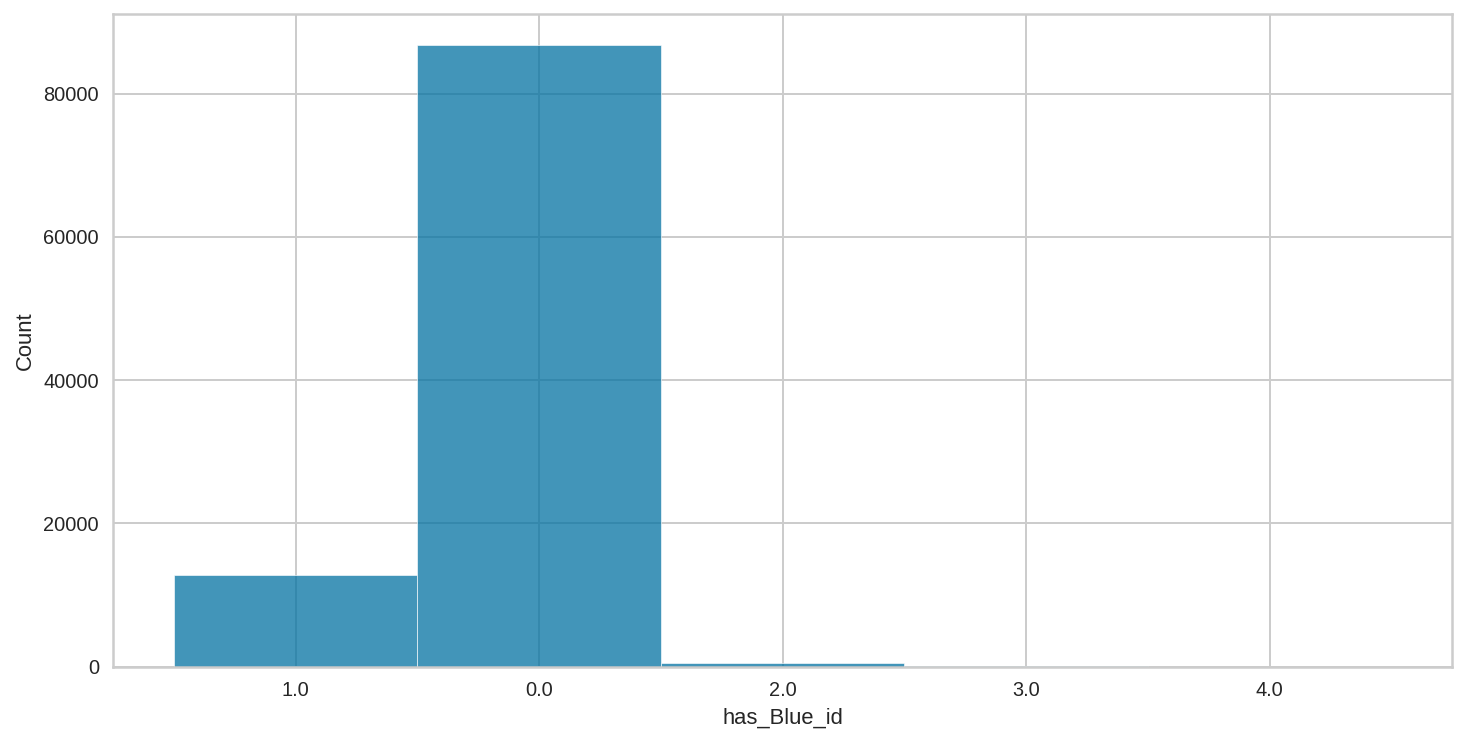

Value Occurence(%)
0.0    0.86734
1.0    0.12749
2.0    0.00501
3.0    0.00014
4.0    0.00002
Name: has_Blue_id, dtype: float64



In [15]:
for i in has_list:
    plt.figure(figsize=(12,6))
    print (color.BOLD + i + color.END)
    sns.histplot(data=df_vk[i], binwidth=0.5)
    plt.show()
    print('Value Occurence(%)')
    print(df_vk[i].value_counts(normalize = True))
    print()

Заменяю все аномальный значение на NaN Далее, вывожу отдельный датасет, что посмотреть другие колонки. Видим, что есть ряды где мы имеем NaN для has_company_id колонки, но у пользователя есть покупки. *Можно предположить что если has колонка имеет значение больше чем 1.0, то пользователь имеет более одного аккаунта, но есть несколько противоречий - 1. Во-первых, описание колонки предполагает, что переменная может хранить только True (1) или False (0). 2. has_Red_id не имеет аномальных значений такого рода, хотя мы имеем куда больше зарегистрированных пользователей в этой компании чем в осталльных вместе взятых (логично предположить, что если значения:2.0, 3.0, 4.0 отображают наличие нескольких аккаунтов человека в компании, то такая большая компания как Red тоже бы имела таких потребителей.

In [16]:
for column in df_vk[has_list]:
    df_vk[column] = df_vk[column].astype(float)
    df_vk[column] = df_vk[column].astype(int)
    df_vk.loc[~df_vk[column].isin([0, 1]), column] = np.nan

In [17]:
has_nan_filter = df_vk[has_list].isna().any(axis=1)
new_df = df_vk.loc[has_nan_filter, :]
new_df

,HID,has_Red_id,has_Green_id,has_Black_id,has_Blue_id,Blue_activity_count,Blue_gmv_total,Green_gmv_total,Green_gmv_order_count,Black_gmv_total,...,Blue_android,Red_apple,Green_apple,Black_apple,Blue_apple,is_msk,Red_web,Green_web,Black_web,Blue_web
453,0039258b25362580dcd01b56251256fbf1e259,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
471,003b63ddb7f536903615d596d70eb131,0.0,0.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
609,0038d01c189e82583dc6691bcbbcc3b36,1.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
619,00395625388be0250d8b00b73089f1b3e5,0.0,0.0,0.0,NaN,4.0,136,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
799,0025b1f8b1f3cd3d1e518060539250b259f,1.0,1.0,1.0,NaN,12.0,0.0,9056,12.0,2390,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99339,325193deb3d325d259d17dcb3fe95bb59025,0.0,NaN,0.0,NaN,2.0,0.0,2272,2019-05-02 00:00:00,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
99588,3253fc50b25b3925c6f119deb15c3c8c637,1.0,0.0,0.0,NaN,23.0,202,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
99782,32525125313b10cd961c39cbb3b566fcf91,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
99852,32525908be25b8b3cf065c19b025eb18f9dd,1.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Я решаю сделать маски для датасета, которые работают следующим образом: смотрим на колонки`company_gmv_total`, `company_gvm_order_count` если там есть отличное от 0 (отрицательных значений в датасете нет) значение то пользователь имеет заказы (следовательно он имеет аккаунт) и мы заменяем NaN в has колонках (маски "берут во мнимание" цвет компании) 

In [18]:
#Пример превращения

has_blue_nan_mask = df_vk['has_Blue_id'].isna()
df_vk.loc[has_blue_nan_mask]

,HID,has_Red_id,has_Green_id,has_Black_id,has_Blue_id,Blue_activity_count,Blue_gmv_total,Green_gmv_total,Green_gmv_order_count,Black_gmv_total,...,Blue_android,Red_apple,Green_apple,Black_apple,Blue_apple,is_msk,Red_web,Green_web,Black_web,Blue_web
453,0039258b25362580dcd01b56251256fbf1e259,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
471,003b63ddb7f536903615d596d70eb131,0.0,0.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
609,0038d01c189e82583dc6691bcbbcc3b36,1.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
619,00395625388be0250d8b00b73089f1b3e5,0.0,0.0,0.0,NaN,4.0,136,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
799,0025b1f8b1f3cd3d1e518060539250b259f,1.0,1.0,1.0,NaN,12.0,0.0,9056,12.0,2390,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99339,325193deb3d325d259d17dcb3fe95bb59025,0.0,NaN,0.0,NaN,2.0,0.0,2272,2019-05-02 00:00:00,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
99588,3253fc50b25b3925c6f119deb15c3c8c637,1.0,0.0,0.0,NaN,23.0,202,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
99782,32525125313b10cd961c39cbb3b566fcf91,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
99852,32525908be25b8b3cf065c19b025eb18f9dd,1.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [19]:
has_green_nan_mask = df_vk['has_Green_id'].isna()
green_zeros_mask = (df_vk['Green_gmv_total'] == 0.0) & (df_vk['Green_gmv_order_count'] == 0.0)
df_vk.loc[has_green_nan_mask & ~green_zeros_mask, 'has_Green_id'] = 1.0

has_black_nan_mask = df_vk['has_Black_id'].isna()
black_zeros_mask = (df_vk['Black_gmv_total'] == 0.0) & (df_vk['Black_gmv_order_count'] == 0.0)
df_vk.loc[has_black_nan_mask & ~black_zeros_mask, 'has_Black_id'] = 1.0

has_blue_nan_mask = df_vk['has_Blue_id'].isna()
blue_zeros_mask = (df_vk['Blue_gmv_total'] == 0.0) & (df_vk['Blue_activity_count'] == 0.0)
df_vk.loc[has_blue_nan_mask & ~blue_zeros_mask, 'has_Blue_id'] = 1.0

df_vk.loc[has_blue_nan_mask]

,HID,has_Red_id,has_Green_id,has_Black_id,has_Blue_id,Blue_activity_count,Blue_gmv_total,Green_gmv_total,Green_gmv_order_count,Black_gmv_total,...,Blue_android,Red_apple,Green_apple,Black_apple,Blue_apple,is_msk,Red_web,Green_web,Black_web,Blue_web
453,0039258b25362580dcd01b56251256fbf1e259,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
471,003b63ddb7f536903615d596d70eb131,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
609,0038d01c189e82583dc6691bcbbcc3b36,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
619,00395625388be0250d8b00b73089f1b3e5,0.0,0.0,0.0,1.0,4.0,136,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
799,0025b1f8b1f3cd3d1e518060539250b259f,1.0,1.0,1.0,1.0,12.0,0.0,9056,12.0,2390,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99339,325193deb3d325d259d17dcb3fe95bb59025,0.0,1.0,0.0,1.0,2.0,0.0,2272,2019-05-02 00:00:00,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
99588,3253fc50b25b3925c6f119deb15c3c8c637,1.0,0.0,0.0,1.0,23.0,202,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
99782,32525125313b10cd961c39cbb3b566fcf91,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
99852,32525908be25b8b3cf065c19b025eb18f9dd,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Выяснилось, что все ряды с NaN значениями имеют заказы (в связанных по компании колонках) :)

In [20]:
has_nan_filter = df_vk[has_list].isna().any(axis=1)
new_df = df_vk.loc[has_nan_filter, :]
new_df

,HID,has_Red_id,has_Green_id,has_Black_id,has_Blue_id,Blue_activity_count,Blue_gmv_total,Green_gmv_total,Green_gmv_order_count,Black_gmv_total,...,Blue_android,Red_apple,Green_apple,Black_apple,Blue_apple,is_msk,Red_web,Green_web,Black_web,Blue_web


**Чистка не has колонок**

Удаляем ранее найденные datetime данные из датасета. *Можно было заменить их на медианные значения (так как все continuous данные имею right-skewed распределение) по колонке поставив фильтр по наличию регистрации для компании (с которой колонка связана). Но я решил, что таких данных мало и можно их просто удалить

In [21]:
df_vk = df_vk.applymap(lambda x: np.nan if isinstance(x, datetime.datetime) else x)

In [22]:
df_vk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 1 to 100000
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   HID                    100000 non-null  object 
 1   has_Red_id             100000 non-null  float64
 2   has_Green_id           100000 non-null  float64
 3   has_Black_id           100000 non-null  float64
 4   has_Blue_id            100000 non-null  float64
 5   Blue_activity_count    99993 non-null   object 
 6   Blue_gmv_total         99999 non-null   object 
 7   Green_gmv_total        100000 non-null  object 
 8   Green_gmv_order_count  99997 non-null   object 
 9   Black_gmv_total        100000 non-null  object 
 10  Black_gmv_order_count  99997 non-null   object 
 11  Red_android            100000 non-null  object 
 12  Green_android          100000 non-null  object 
 13  Black_android          100000 non-null  object 
 14  Blue_android           100000 non-nu

In [23]:
columns_list = df_vk.columns.to_list()
for column in columns_list:
    print(column)
    print(df_vk[column].unique())
    print()

HID
['00003c7fb5e57ce673f1801f3679f5c25' '00006b602533083e3bebfcbff08613931'
 '0000736c3f76339196cb1cc759b8363b' ...
 '325563dbbb35c393be38c5c79373ed180' '3255650825570bcc93bc9b076b0bfbb25e6'
 '325566ec18c0db59083f5f6bb1b5f93d5']

has_Red_id
[0. 1.]

has_Green_id
[0. 1.]

has_Black_id
[0. 1.]

has_Blue_id
[1. 0.]

Blue_activity_count
['2.0' '0.0' '1.0' '17.0' '13.0' '5.0' '6.0' '26.0' '8.0' '4.0' '27.0'
 '19.0' '12.0' '9.0' '3.0' '20.0' '10.0' '23.0' '7.0' '16.0' '14.0' '15.0'
 '53.0' nan '32.0' '11.0' '18.0' '24.0' '119.0' '49.0' '39.0' '21.0'
 '35.0' '72.0' '30.0' '71.0' '28.0' '42.0' '34.0' '41.0' '22.0' '29.0'
 '36.0' '90.0' '40.0' '43.0' '51.0' '44.0' '25.0' '31.0' '45.0' '67.0'
 '33.0' '101.0' '74.0' '46.0' '111.0' '66.0' '38.0' '63.0' '100.0' '237.0'
 '59.0' '37.0' '47.0']

Blue_gmv_total
['0.0' 200 752 136 198 924 44 84 42 290 12 400 22 50 196 106 90 4 788 1208
 162 346 98 272 580 620 74 364 408 288 626 14 48 2 1058 134 312 18 34 536
 38 206 378 114 170 60 824 352 124 36 368 19

Меняем формат данных для датасета

In [24]:
df_vk = df_vk.dropna()

for column in df_vk.drop(columns='HID').columns.to_list():
    df_vk[column] = df_vk[column].astype(float)
    df_vk[column] = df_vk[column].astype(int)
df_vk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99986 entries, 1 to 100000
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   HID                    99986 non-null  object
 1   has_Red_id             99986 non-null  int64 
 2   has_Green_id           99986 non-null  int64 
 3   has_Black_id           99986 non-null  int64 
 4   has_Blue_id            99986 non-null  int64 
 5   Blue_activity_count    99986 non-null  int64 
 6   Blue_gmv_total         99986 non-null  int64 
 7   Green_gmv_total        99986 non-null  int64 
 8   Green_gmv_order_count  99986 non-null  int64 
 9   Black_gmv_total        99986 non-null  int64 
 10  Black_gmv_order_count  99986 non-null  int64 
 11  Red_android            99986 non-null  int64 
 12  Green_android          99986 non-null  int64 
 13  Black_android          99986 non-null  int64 
 14  Blue_android           99986 non-null  int64 
 15  Red_apple         

In [25]:
df_vk.describe()

,has_Red_id,has_Green_id,has_Black_id,has_Blue_id,Blue_activity_count,Blue_gmv_total,Green_gmv_total,Green_gmv_order_count,Black_gmv_total,Black_gmv_order_count,...,Blue_android,Red_apple,Green_apple,Black_apple,Blue_apple,is_msk,Red_web,Green_web,Black_web,Blue_web
count,99986.000000,99986.000000,99986.000000,99986.000000,99986.000000,99986.000000,99986.000000,99986.000000,99986.000000,99986.000000,...,99986.000000,99986.000000,99986.000000,99986.000000,99986.000000,99986.000000,99986.000000,99986.000000,99986.000000,99986.000000
mean,0.558718,0.008821,0.010762,0.132559,0.210039,2.461325,59.839177,0.076991,94.695457,0.043856,...,0.080421,0.108745,0.006161,0.017822,0.046457,0.119177,0.671044,0.001980,0.014582,0.106325
std,0.496543,0.093507,0.103179,0.339099,2.099500,126.682942,1230.627532,1.693890,1699.044593,0.749914,...,0.271946,0.311321,0.078249,0.132307,0.210473,0.323998,0.469836,0.044456,0.119873,0.308255
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,237.000000,32302.000000,94106.000000,168.000000,188252.000000,60.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Прододжаем убирать аномальные данные. Я запустил цикл, который выводит гистограммы и бокс плоты для всех continous колонок

In [26]:
#Создаем листы колонок для каждой компании
red_cols = [col for col in df_vk.columns if 'Red' in col]
green_cols = [col for col in df_vk.columns if 'Green' in col]
black_cols = [col for col in df_vk.columns if 'Black' in col]
blue_cols = [col for col in df_vk.columns if 'Blue' in col]

#Листы для разных типов данных
binary_cols = ['has_Red_id','has_Green_id','has_Black_id','has_Blue_id','Red_android','Green_android','Black_android',
              'Blue_android','Red_apple','Green_apple','Black_apple','Blue_apple','Red_web','Green_web','Black_web',
              'Blue_web', 'is_msk']
numeric_cols = ['Green_gmv_total', 'Black_gmv_total', 'Blue_gmv_total', 'Green_gmv_order_count', 'Black_gmv_order_count',
               'Blue_activity_count']

In [27]:
df_vk.Green_gmv_total.value_counts(ascending = False)

0        99104
500         29
400         28
900         14
1000        13
         ...  
3680         1
6050         1
2810         1
7782         1
15484        1
Name: Green_gmv_total, Length: 679, dtype: int64

Company name: Green


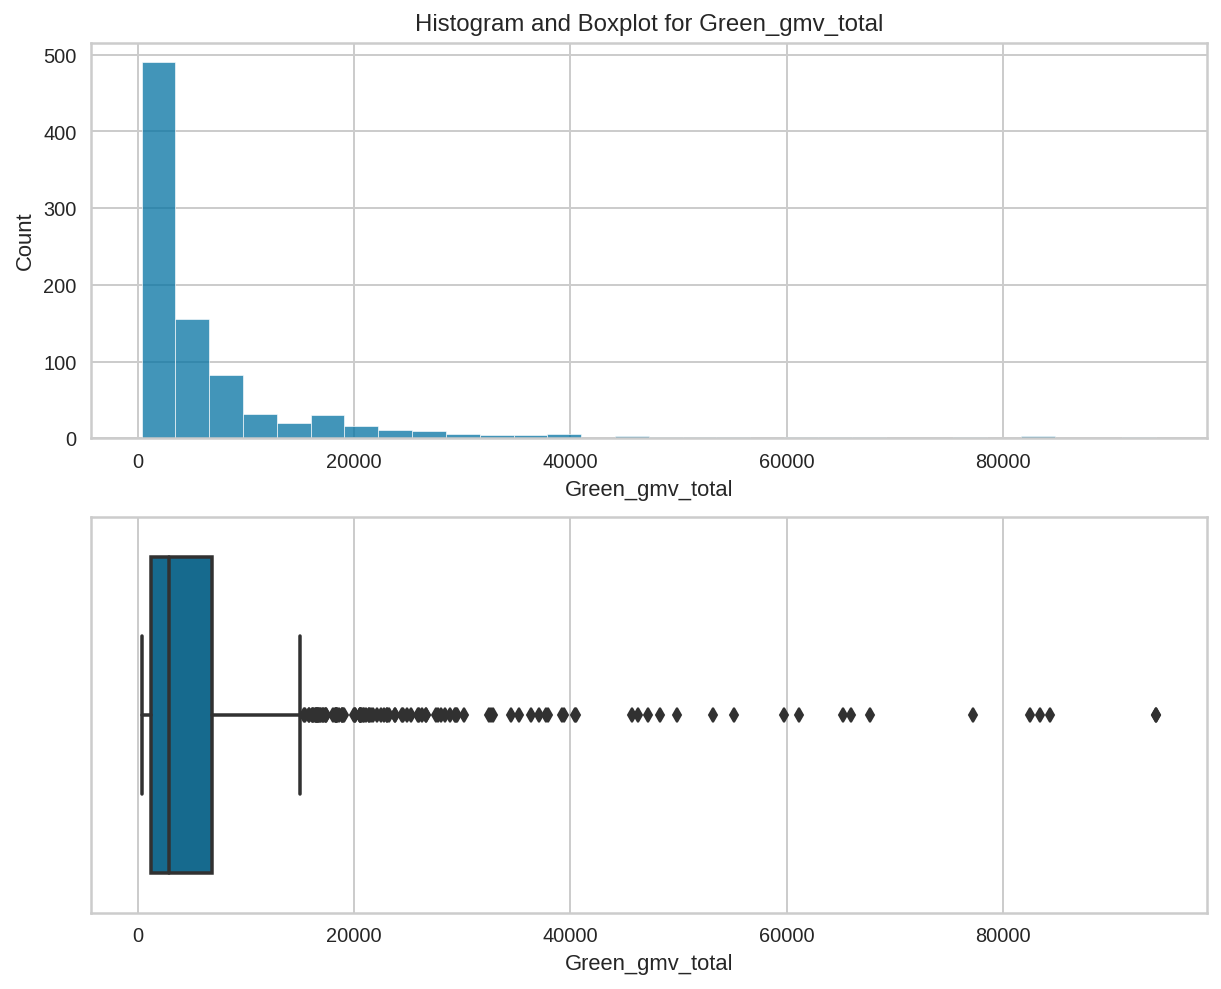

Skewness of the distribution: 4.074295
Kurtosis of the distribution: 21.258969



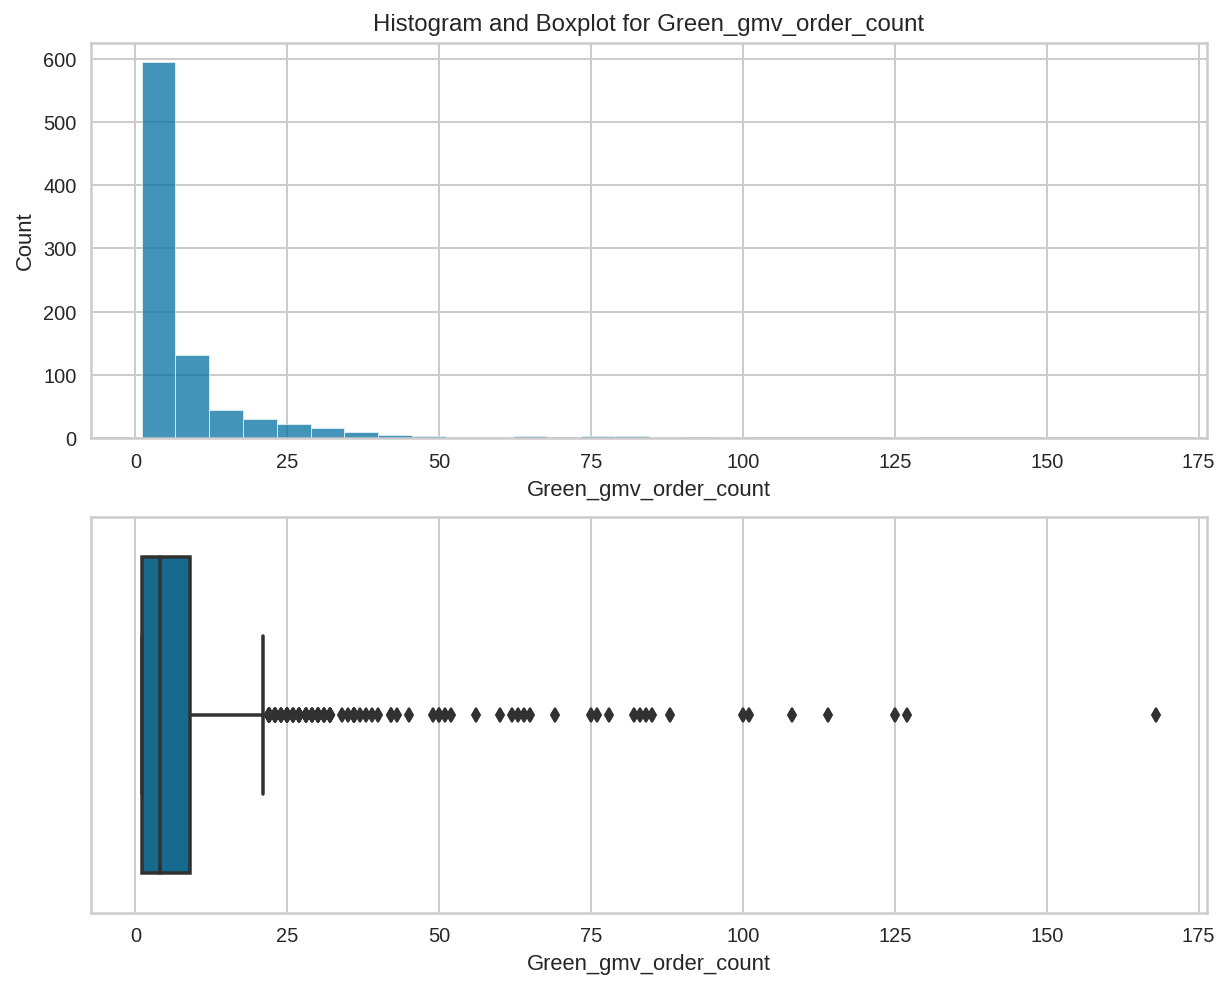

Skewness of the distribution: 4.633310
Kurtosis of the distribution: 28.198959

Company name: Black


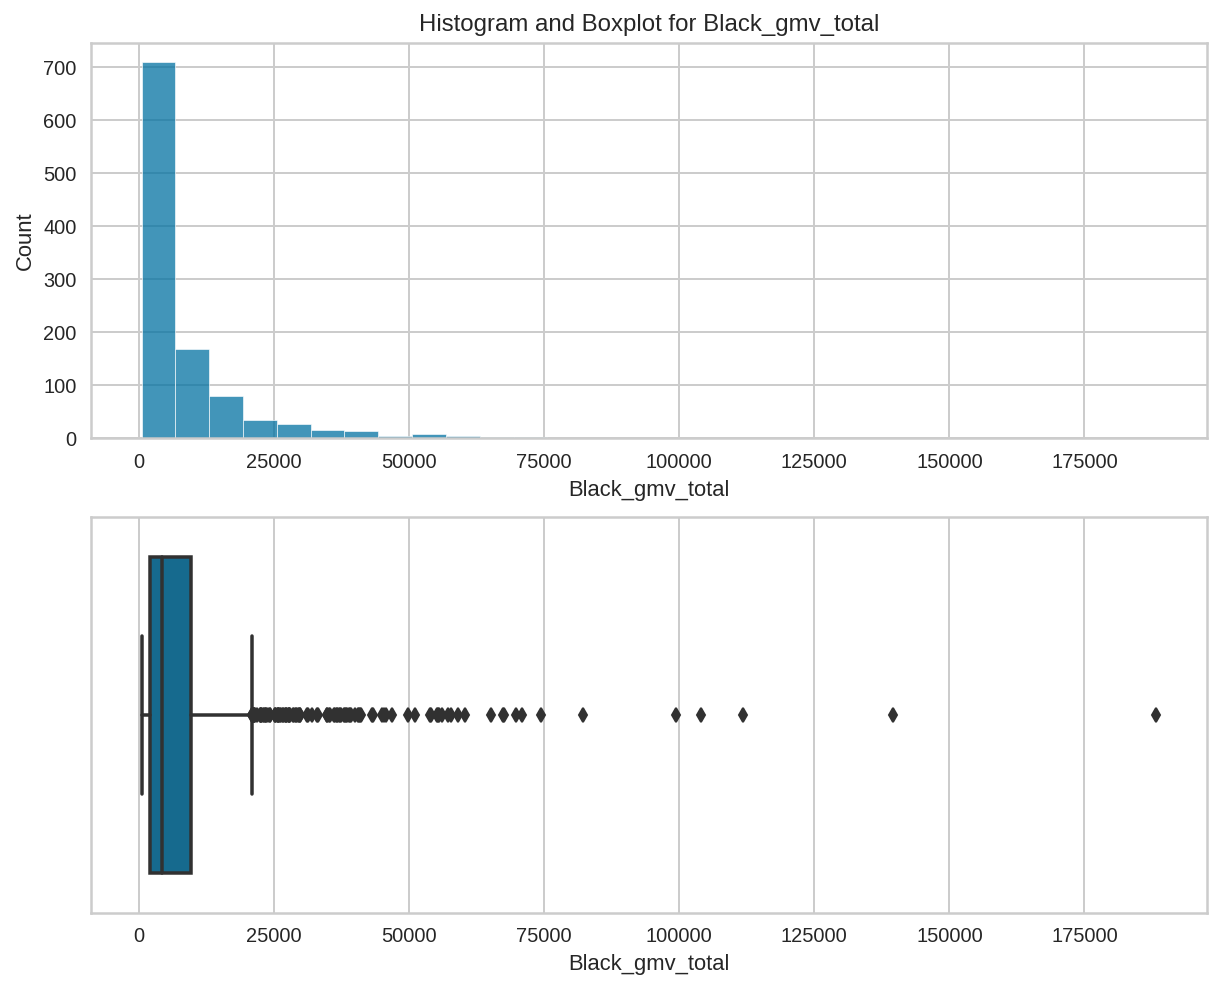

Skewness of the distribution: 5.153304
Kurtosis of the distribution: 42.574220



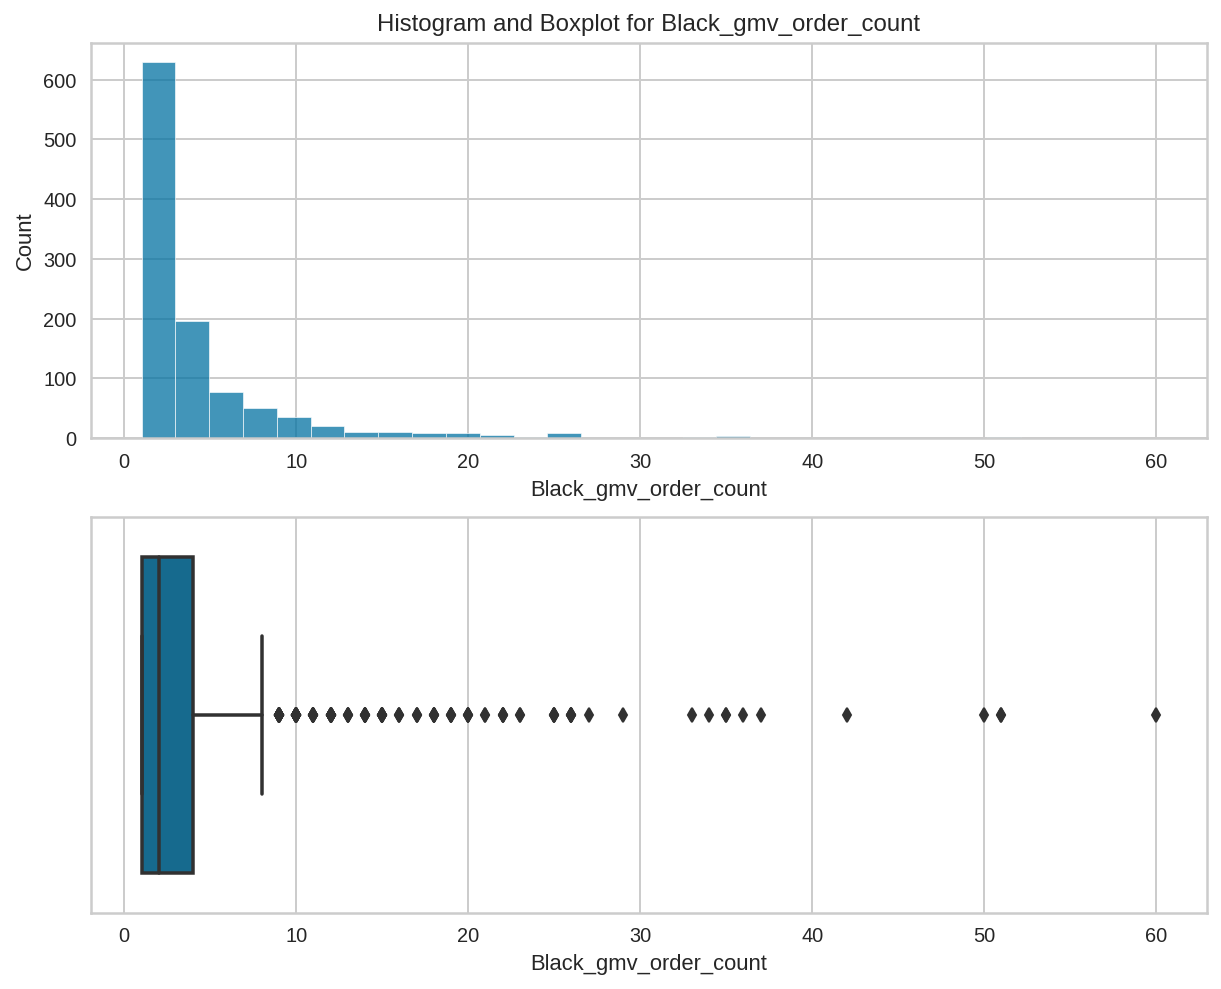

Skewness of the distribution: 4.126863
Kurtosis of the distribution: 23.249242

Company name: Blue


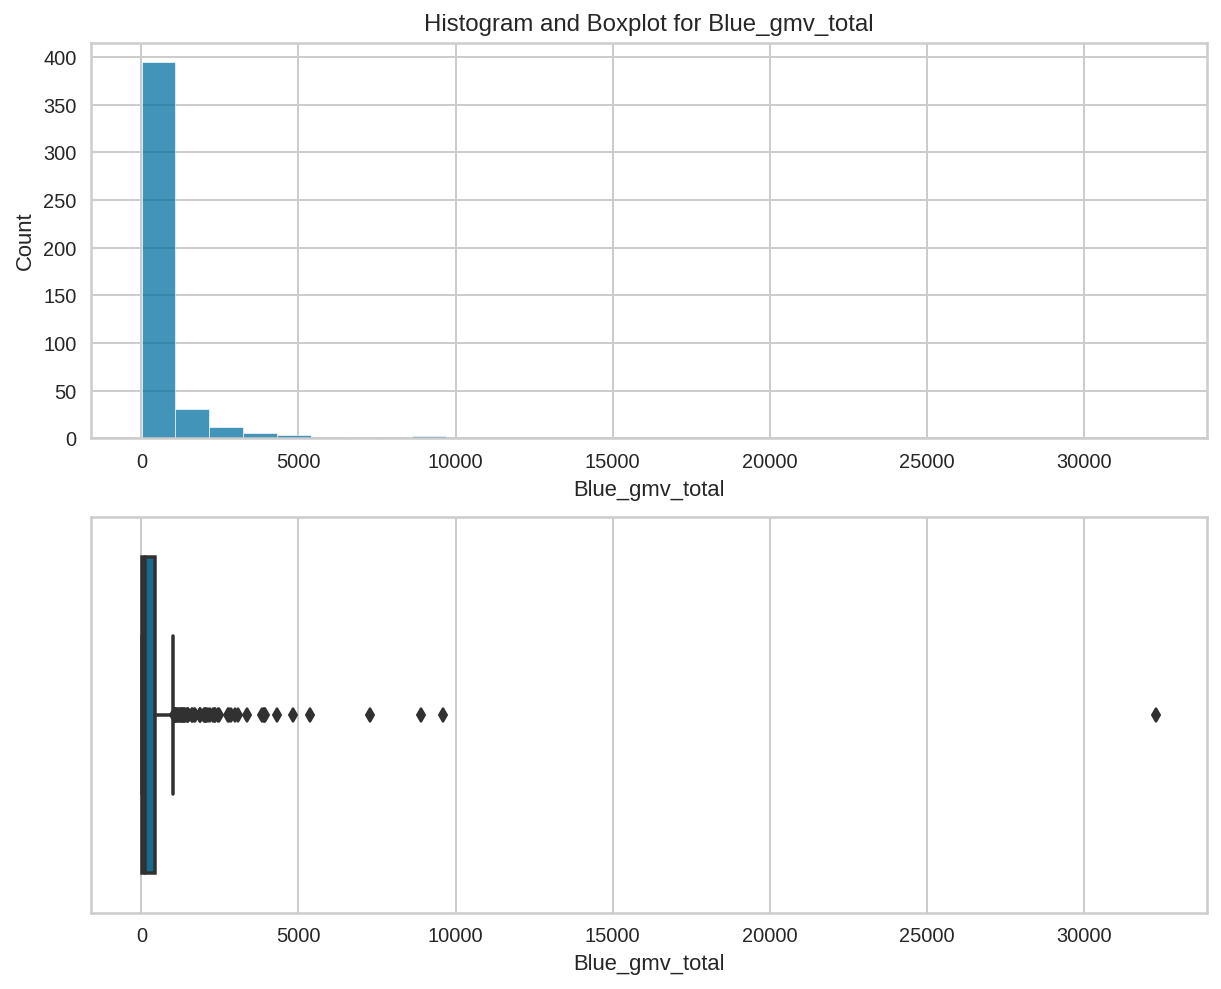

Skewness of the distribution: 12.901381
Kurtosis of the distribution: 214.209050



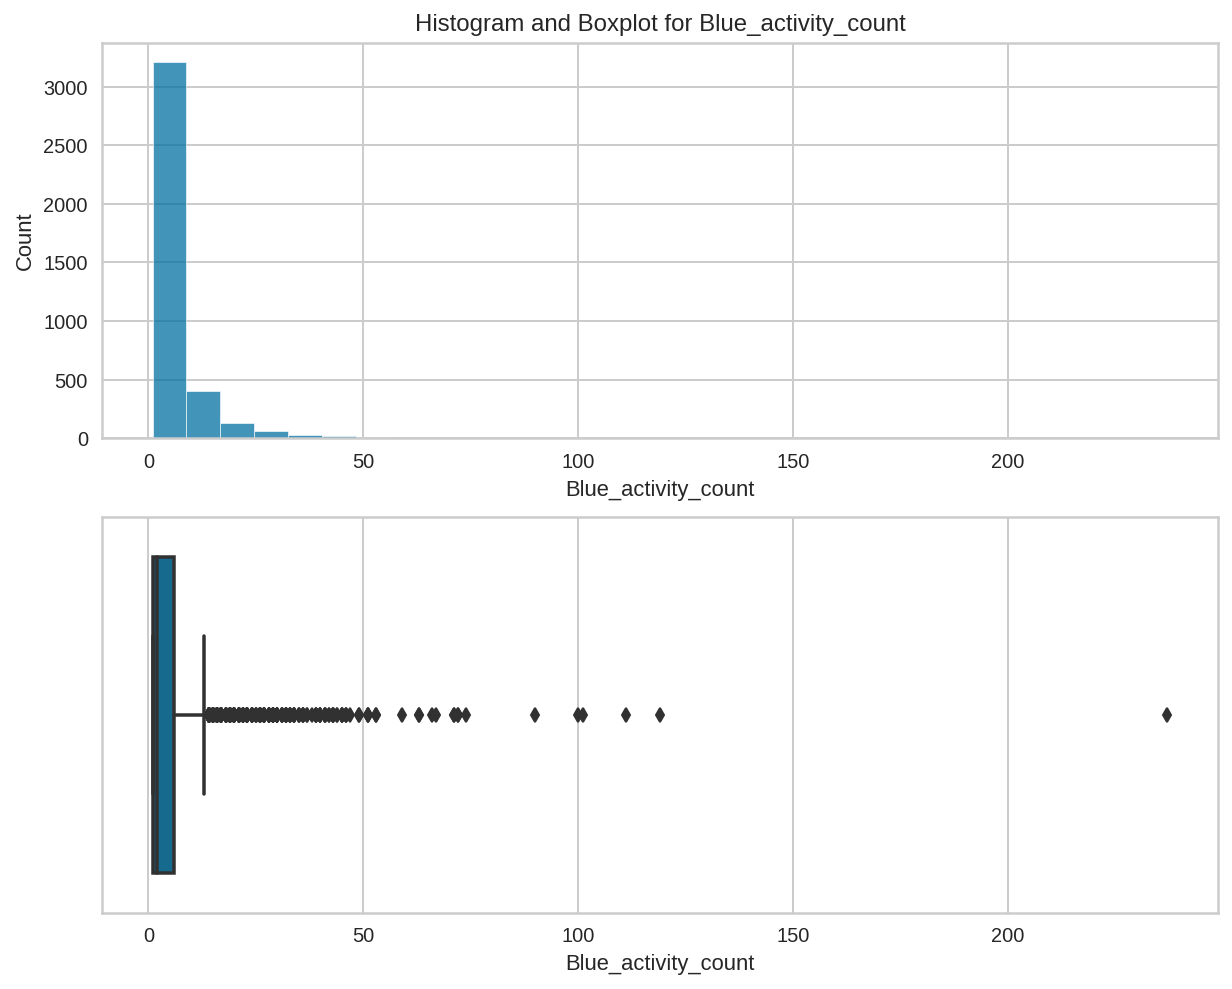

Skewness of the distribution: 7.746693
Kurtosis of the distribution: 126.629890



In [28]:
company_color = ['Green', 'Black', 'Blue']
for company in company_color:
    company_column_list = [col for col in df_vk.columns if company in col]
    print(color.BOLD + f'Company name: {company}' + color.END)
    for column in numeric_cols:
        if column in company_column_list:
            fig, axs = plt.subplots(2, figsize=(10, 8))

            # Фильтр для не нулевых значений
            column_data = df_vk[column][df_vk[column] != 0]
        
            # Histogram plot
            axs[0].set_title(f'Histogram and Boxplot for {column}')
            sns.histplot(column_data, ax=axs[0], bins=30)

            # Box plot
            sns.boxplot(column_data, ax=axs[1])


            plt.show()
            print("Skewness of the distribution: %f" % column_data.skew())
            print("Kurtosis of the distribution: %f" % column_data.kurt())
            print()

Видим что все распределения смешенны вправо, что логично для таких типов данных. Кроме, на боксплотах можно увидеть наличие аномальных значений. Для их чистки можно использовать интерквантильные промежутки: я вывожу границы удаления переменных в следующем чанки. Другой вариант, просто отсечь верхнюю часть данных по выбранному квантилю, после нескольких проб я выбрал отсекание по 0.97 квантилю (я не стал использовать интерквантильные промежутки). Важно сказать, что каждая колонка перед чисткой подвергается фильтрации в рамках которой я отсекаю все нулевые значения. Так как есть колонки где мы имеем до 99.5 % нулевых значений

In [29]:
outliers_remedy = pd.DataFrame(columns=numeric_cols)

for column in numeric_cols:
    column_data = df_vk[column][df_vk[column] != 0]
    iqr = scipy.stats.iqr(column_data)
    q1 = np.quantile(column_data, .25)
    q3 = np.quantile(column_data, .75)
    outliers_remedy[column] = [q1-1.5*iqr, q3+5*iqr]

outliers_remedy

,Green_gmv_total,Black_gmv_total,Blue_gmv_total,Green_gmv_order_count,Black_gmv_order_count,Blue_activity_count
0,-7283.75,-9235.0,-553.0,-11.0,-3.5,-6.5
1,35237.50,47105.0,2372.0,49.0,19.0,31.0


In [30]:
for column in numeric_cols:
    column_data = df_vk[column][df_vk[column] != 0]
    print(color.BOLD + column + color.END)
    print('Нижний (0.25) квантиль:', round(column_data.quantile(0.25),2))
    print('Средний (0.5) квантиль:', round(column_data.quantile(0.5),2))
    print('Верхний (0.75) квантиль:', round(column_data.quantile(0.75),2))
    print('0.9-ый квантиль:', round(column_data.quantile(0.9),2))
    print('0.97-ой квантиль:', round(column_data.quantile(0.97),2))
    print()

Green_gmv_total
Нижний (0.25) квантиль: 1220.5
Средний (0.5) квантиль: 2861.0
Верхний (0.75) квантиль: 6890.0
0.9-ый квантиль: 17082.2
0.97-ой квантиль: 34929.48

Black_gmv_total
Нижний (0.25) квантиль: 2033.0
Средний (0.5) квантиль: 4170.0
Верхний (0.75) квантиль: 9545.0
0.9-ый квантиль: 20295.0
0.97-ой квантиль: 40681.5

Blue_gmv_total
Нижний (0.25) квантиль: 32.0
Средний (0.5) квантиль: 122.0
Верхний (0.75) квантиль: 422.0
0.9-ый квантиль: 1290.0
0.97-ой квантиль: 2930.78

Green_gmv_order_count
Нижний (0.25) квантиль: 1.0
Средний (0.5) квантиль: 4.0
Верхний (0.75) квантиль: 9.0
0.9-ый квантиль: 22.0
0.97-ой квантиль: 47.28

Black_gmv_order_count
Нижний (0.25) квантиль: 1.0
Средний (0.5) квантиль: 2.0
Верхний (0.75) квантиль: 4.0
0.9-ый квантиль: 9.0
0.97-ой квантиль: 20.0

Blue_activity_count
Нижний (0.25) квантиль: 1.0
Средний (0.5) квантиль: 2.0
Верхний (0.75) квантиль: 6.0
0.9-ый квантиль: 13.0
0.97-ой квантиль: 26.69



In [31]:
df_vk[df_vk['Green_gmv_total'] > 34929.48]

,HID,has_Red_id,has_Green_id,has_Black_id,has_Blue_id,Blue_activity_count,Blue_gmv_total,Green_gmv_total,Green_gmv_order_count,Black_gmv_total,...,Blue_android,Red_apple,Green_apple,Black_apple,Blue_apple,is_msk,Red_web,Green_web,Black_web,Blue_web
726,002538783f0eb73325cb631e7dcd3ff253f,0,1,0,0,0,0,37960,37,0,...,0,0,0,0,0,1,0,0,0,0
4798,01b95e253e96f919f9618b3bdf9779368,1,1,0,0,0,0,65174,85,0,...,0,1,0,0,0,1,1,0,0,1
13652,025f0ced8536c9950c6933388e7366c251,1,1,0,0,0,0,67656,127,0,...,0,0,0,0,0,1,0,0,0,0
14824,055b3eb3b6718bbdd3d93925fb6183b258,0,1,0,0,0,0,77162,101,0,...,0,0,0,0,0,1,0,0,0,0
17949,068969b013b8160e9303c6b02556cd673,1,1,1,1,15,2026,40488,30,12894,...,0,1,1,1,1,1,0,0,0,0
18955,06ebf2538b9bc839c6887bde3bbef53b3,1,1,0,1,1,0,53138,51,0,...,1,1,1,0,0,1,1,0,0,0
20025,0725cdcb363b9911676fbf06f257fb6d63,0,1,0,0,0,0,46238,83,0,...,0,0,0,0,0,1,0,0,0,0
20274,0763e0f989b31250d19b68c69715311fb,1,1,0,0,0,0,37744,64,0,...,0,1,1,0,0,1,1,0,0,0
20568,077f1e1fe38901ed76bdb86b9e325db81,0,1,0,0,0,0,37080,19,0,...,0,0,0,0,0,1,1,0,0,0
27321,09fcbf793379e0355cf725cd006b313bf,1,1,0,0,0,0,82470,82,0,...,0,0,0,0,0,1,0,0,0,0


In [32]:
df_vk_cleaned = df_vk[(df_vk['Green_gmv_total'] <= 34929.48)]
df_vk_cleaned = df_vk_cleaned[(df_vk_cleaned['Black_gmv_total'] <= 40681.5)]
df_vk_cleaned = df_vk_cleaned[(df_vk_cleaned['Blue_gmv_total'] <= 2930.78)]
df_vk_cleaned = df_vk_cleaned[(df_vk_cleaned['Green_gmv_order_count'] <= 47.28)]
df_vk_cleaned = df_vk_cleaned[(df_vk_cleaned['Black_gmv_order_count'] <= 20.0)]
df_vk_cleaned = df_vk_cleaned[(df_vk_cleaned['Blue_activity_count'] <= 26.69)]

In [33]:
print ('df_vk shape:', df_vk.shape)
print ('df_vk_cleaned shape:', df_vk_cleaned.shape)

df_vk shape: (99986, 24)
df_vk_cleaned shape: (99790, 24)


Благодаря боксплотам видим, что чистка помогла исправить ситуацию с аутлаерами (я не стал использовать "жесткий" потолок для удаления, так как боюсь потерять часть важных данных)

Company name: Green


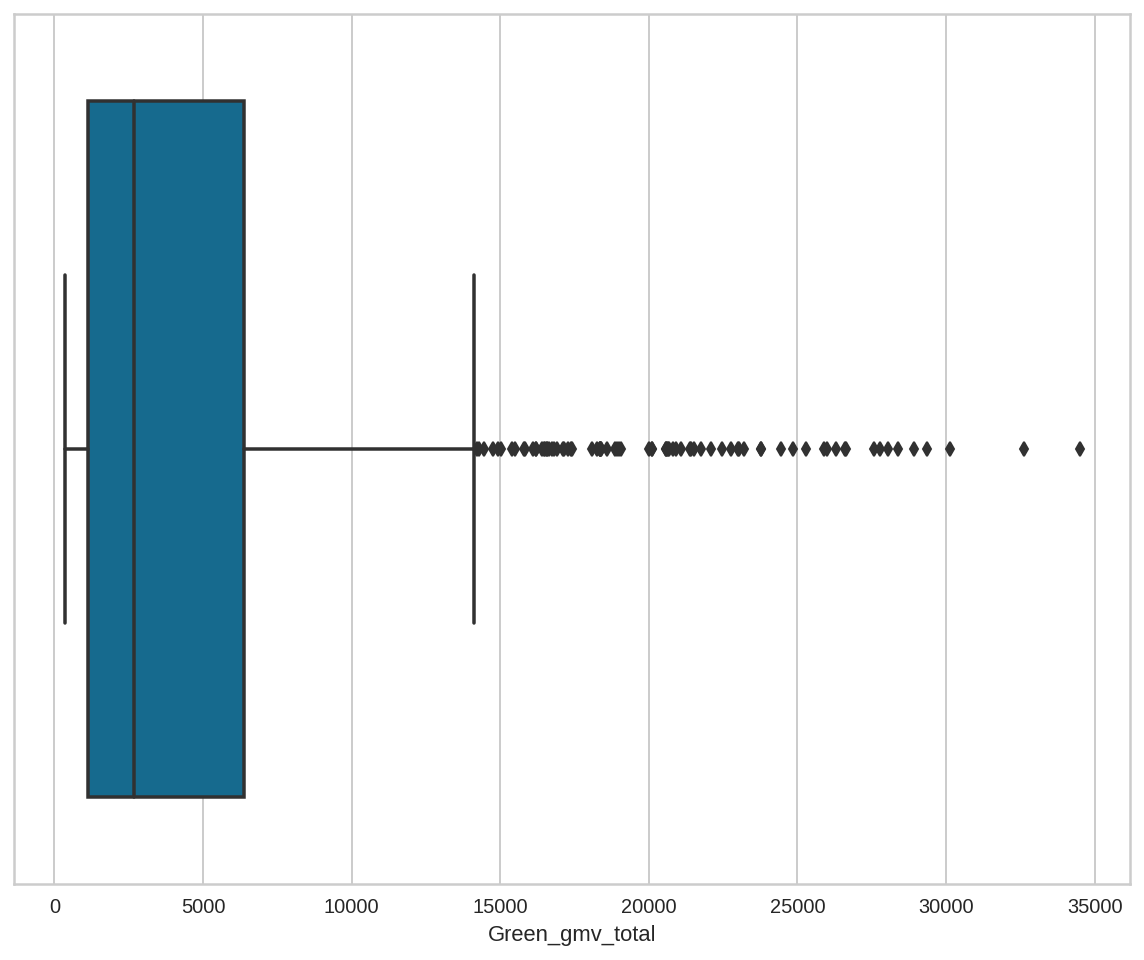

Skewness of the distribution: 2.084250
Kurtosis of the distribution: 4.285461



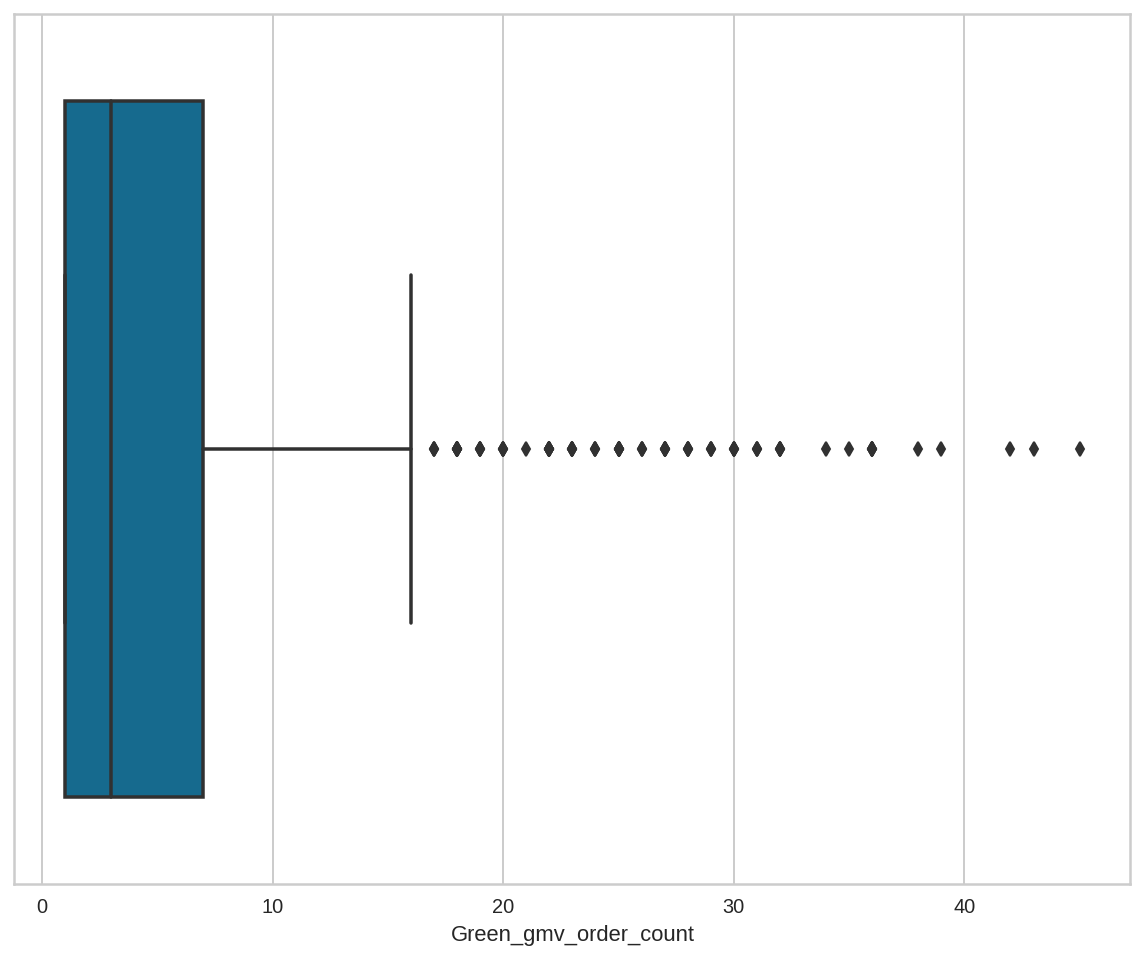

Skewness of the distribution: 2.217584
Kurtosis of the distribution: 4.997562

Company name: Black


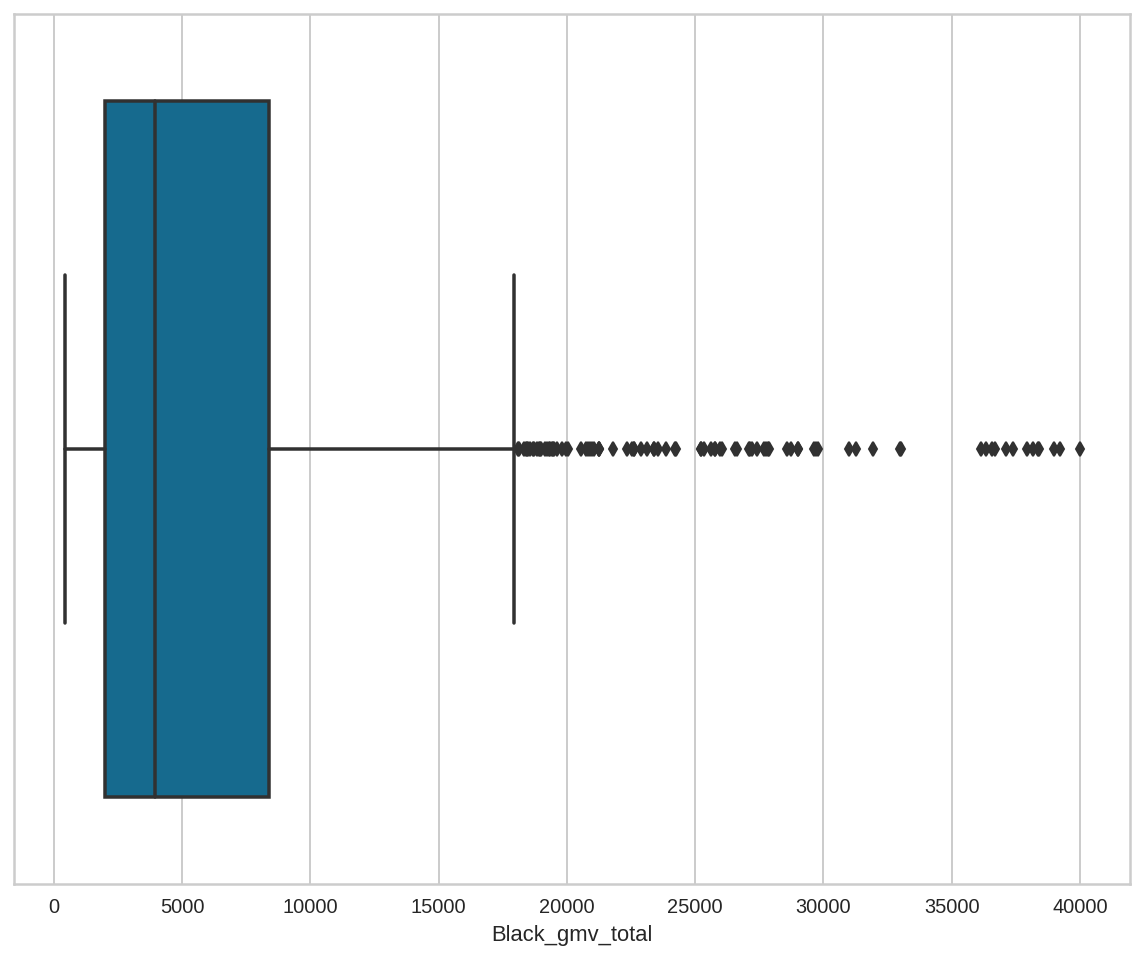

Skewness of the distribution: 2.111574
Kurtosis of the distribution: 4.697556



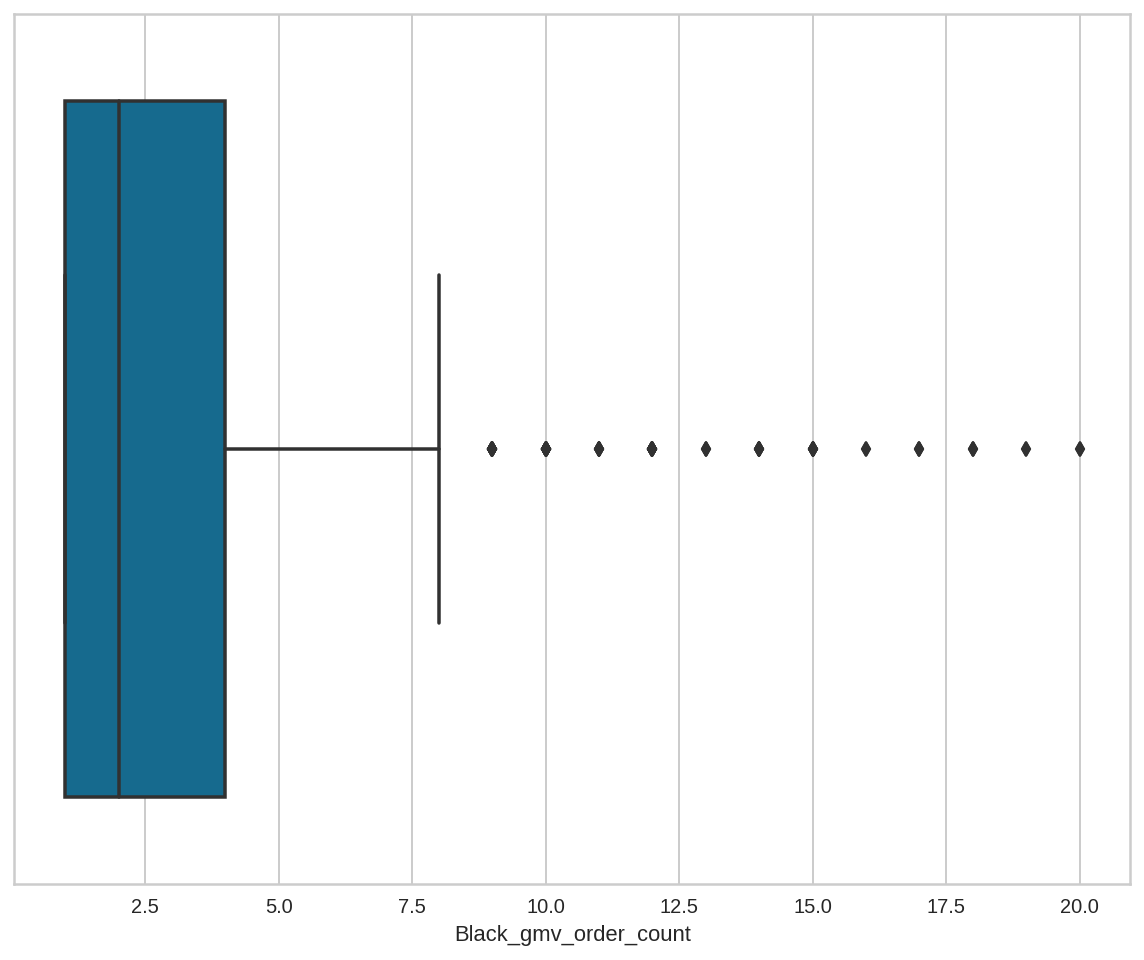

Skewness of the distribution: 2.268751
Kurtosis of the distribution: 5.626370

Company name: Blue


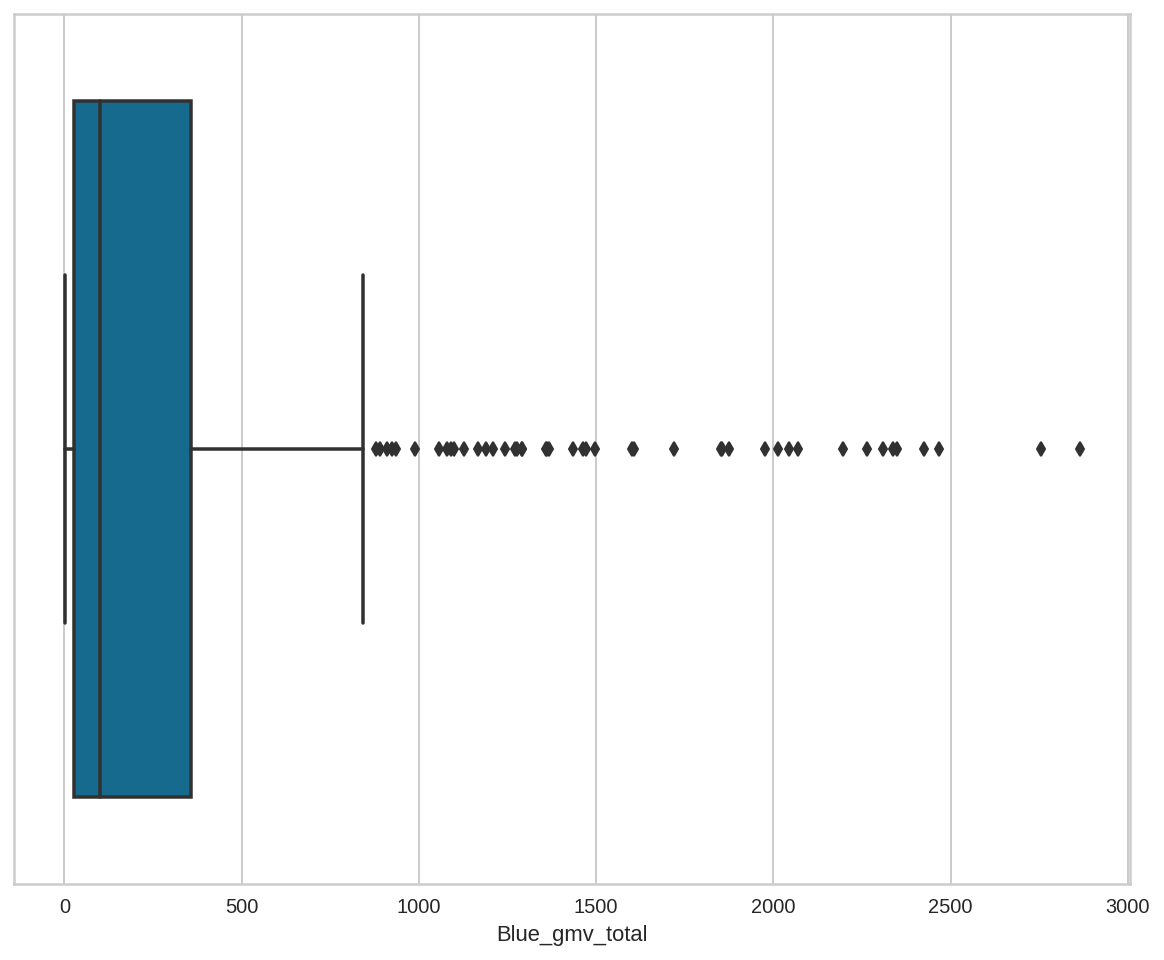

Skewness of the distribution: 2.522460
Kurtosis of the distribution: 6.497707



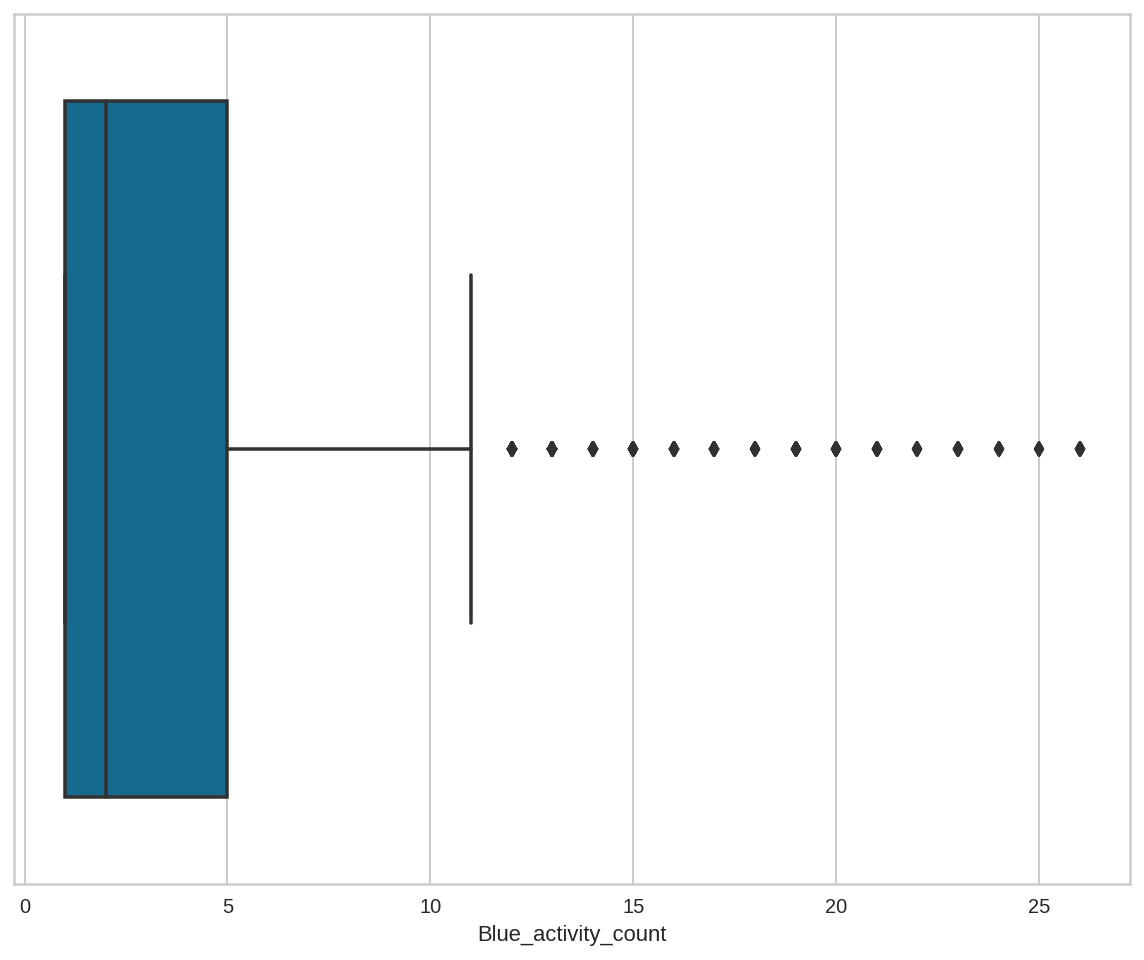

Skewness of the distribution: 2.137982
Kurtosis of the distribution: 4.584255



In [34]:
#Boxplots for cleaned dataframe

company_color = ['Green', 'Black', 'Blue']
for company in company_color:
    company_column_list = [col for col in df_vk.columns if company in col]
    print(color.BOLD + f'Company name: {company}' + color.END)
    for column in numeric_cols:
        if column in company_column_list:

            # Фильтр для не нулевых значений
            plt.figure(figsize=(10,8))
            column_data = df_vk_cleaned[column][df_vk_cleaned[column] != 0]

            # Box plot
            sns.boxplot(column_data)


            plt.show()
            print("Skewness of the distribution: %f" % column_data.skew())
            print("Kurtosis of the distribution: %f" % column_data.kurt())
            print()

## 3 INSIGHTS

   **About dataset**

* `Hid` - human_id, зашифрованный персональный идентификатор пользователя компаний
* `has_company_id` - наличие зарегистрированного аккаунта в компании
* `company_gmv_total` - суммарный **gmv** пользователя в сервисе
* `company_gvm_order_count` - количество успешных заказов пользователя в сервисе
* `company_activity_count` - количество активных действий пользователя в сервисе
* `company_android` - установленное у пользователя приложение компании на платформе **android**
* `company_apple` - установленное у пользователя приложение компании на платформе **Apple**
* `company _web` - установленное у пользователя приложение компании на **ПК**
* `is_msk` - территориальное расположение в Москве

Делаю корреляционную матрицу, чтобы иметь возможность заметить интересные линейные взаимоотношения между переменными при наличии, но такие отсутствуют. Да, видно, что есть корреляция между такими переменными как **has_Green_id** и **Green_gmv_total**. Но это не является чем-то контринтуитивным, так как именные зарегистрированные пользователи будут заказывать что-либо. 

<AxesSubplot:xlabel='0', ylabel='0'>

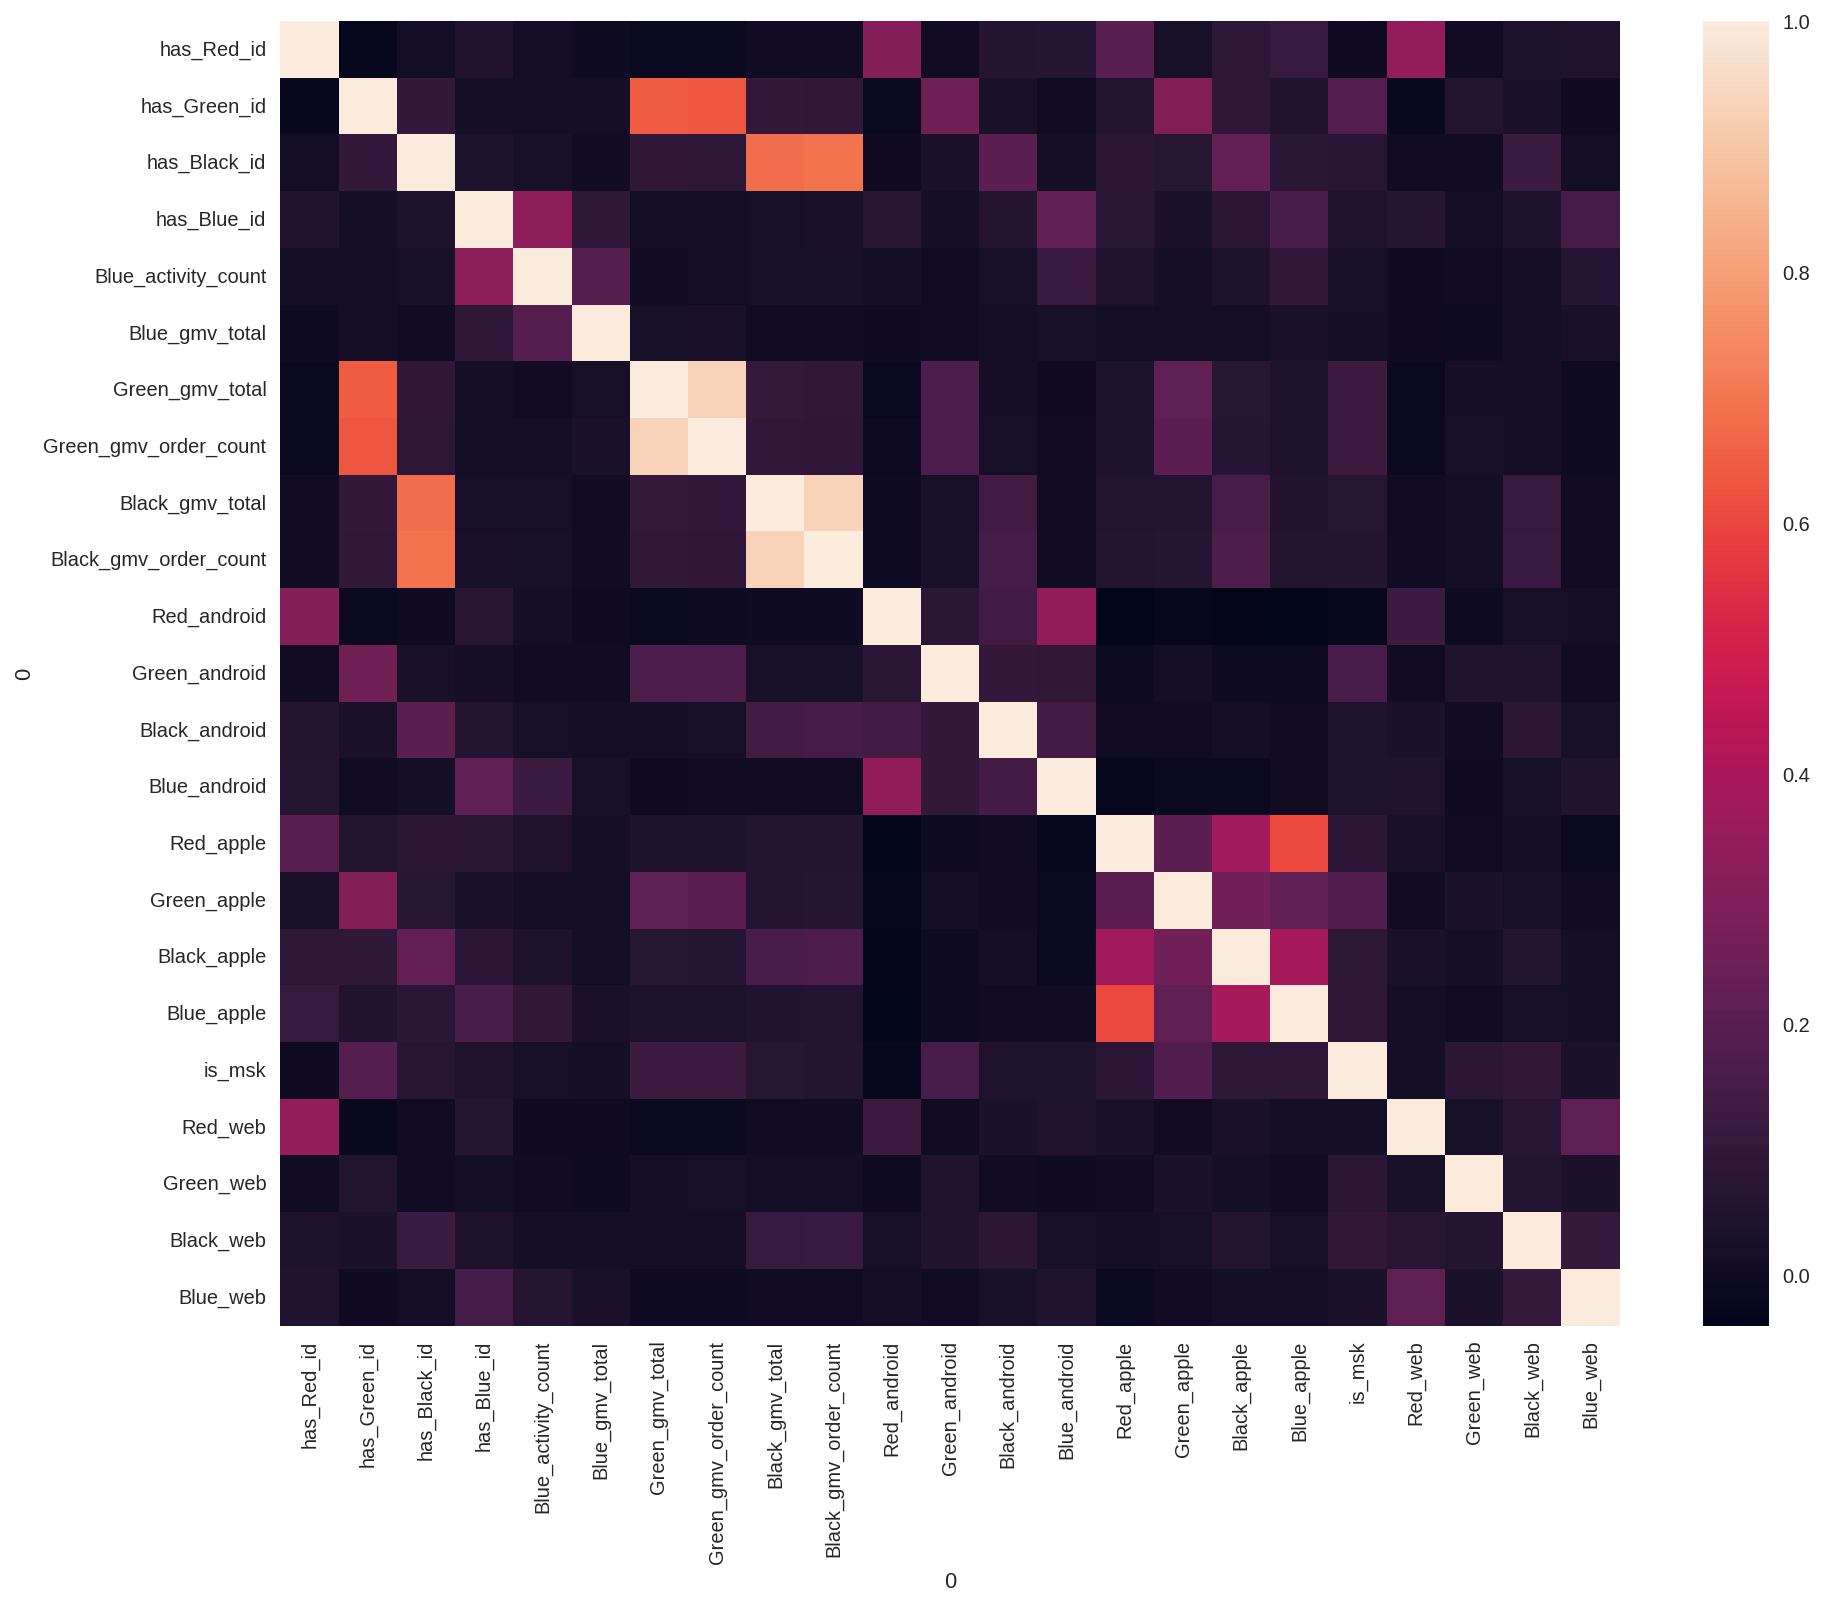

In [35]:
plt.figure(figsize=(15,12))
sns.heatmap(df_vk_cleaned.corr())

In [36]:
#Создаем листы колонок для каждой компании
red_cols = [col for col in df_vk.columns if 'Red' in col]
green_cols = [col for col in df_vk.columns if 'Green' in col]
black_cols = [col for col in df_vk.columns if 'Black' in col]
blue_cols = [col for col in df_vk.columns if 'Blue' in col]

red_cols.append('is_msk')
green_cols.append('is_msk')
black_cols.append('is_msk')
blue_cols.append('is_msk')

In [37]:
green_cols

['has_Green_id',
 'Green_gmv_total',
 'Green_gmv_order_count',
 'Green_android',
 'Green_apple',
 'Green_web',
 'is_msk']

Выведем всю основную информацию по каждой из компаний, ниже вы можете увидеть мини репорт по каждой из компаний. Интересно, что если посмотреть на датасет без ограничений по наличию регистрации пользователя мы найдем много рядов, где пользователь имеет приложения на каком-либо устройстве, но не имеет регистрации в компанни. Тем не менее, я считаю конверсию от регистрации до установки приложения на какое-либо устройство. 

Кроме, мы можем вывести информацию о среднем чеке только для Black и Green компаний, так как остальные компании не имеют соответствующих колонок.

In [38]:
df_vk_cleaned_black = df_vk_cleaned[(df_vk_cleaned['has_Black_id'] == 1.0)]
median_purchase_black = df_vk_cleaned_black['Black_gmv_total'].median()/df_vk_cleaned_black['Black_gmv_order_count'].median()
avg_purchase_black = df_vk_cleaned_black['Black_gmv_total'].mean()/df_vk_cleaned_black['Black_gmv_order_count'].mean()

df_vk_cleaned_green = df_vk_cleaned[(df_vk_cleaned['has_Green_id'] == 1.0)]
median_purchase_green = df_vk_cleaned_green['Green_gmv_total'].median()/df_vk_cleaned_green['Green_gmv_order_count'].median()
avg_purchase_green = df_vk_cleaned_green['Black_gmv_total'].mean()/df_vk_cleaned_green['Black_gmv_order_count'].mean()

df_vk_cleaned_blue = df_vk_cleaned[(df_vk_cleaned['has_Blue_id'] == 1.0)]
mean_gmv_per_activity = df_vk_cleaned_blue['Blue_gmv_total'].mean()/df_vk_cleaned_blue['Blue_activity_count'].mean()

df_vk_cleaned_red = df_vk_cleaned[(df_vk_cleaned['has_Red_id'] == 1.0)]

print(color.BOLD + 'Информация о зарегистрированных в компании пользователях:' + color.END)
print()
print('Медианный и средний чеки в Black company:', round(median_purchase_black,2),'RUB ' '/', round(avg_purchase_black,2), 'RUB')
print('Медианный и средний чеки в Green company:', round(median_purchase_green,2),'RUB ' '/', round(avg_purchase_green,2), 'RUB')
print('Средние затраты на активное действие в Blue company', round(mean_gmv_per_activity,2),'RUB')
print()
print(color.BOLD + 'Информация о распределении аккаунтов зарегистрированных в компании пользователях по устройствам:' + color.END)
print()
print(color.BOLD + 'Red Company' + color.END)
len_r_overall = len(df_vk_cleaned_red)
print('Кол-во зарегистрированных пользователей:', len_r_overall)
len_r_andr = len(df_vk_cleaned_red[df_vk_cleaned_red['Red_android']==1])
print('Процент зарег. пользователей имеющих аккаунт Android:', round(len_r_andr/len_r_overall *100,2), '%')
len_r_apple = len(df_vk_cleaned_red[df_vk_cleaned_red['Red_apple']==1])
print('Процент зарег. пользователей имеющих аккаунт Apple:', round(len_r_apple/len_r_overall *100,2), '%')
len_r_web = len(df_vk_cleaned_red[df_vk_cleaned_red['Red_web']==1])
print('Процент зарег. пользователей имеющих аккаунт Web:', round(len_r_web/len_r_overall *100,2), '%')

len_msk = len(df_vk_cleaned_red[df_vk_cleaned_red['is_msk']==1])
print('Процент зарегистрированных пользователей из Москвы:', round(len_msk/len_r_overall *100,2), '%')

red_conversion_mask = (df_vk_cleaned_red['Red_android'] == 1.0) | (df_vk_cleaned_red['Red_apple'] == 1.0) | (df_vk_cleaned_red['Red_web'] == 1.0)
users_with_application = len(df_vk_cleaned_red.loc[red_conversion_mask])
print('Конверсия из зарегистрированных пользователей в пользователей использующих какое/какие либо приложение(я):', round(users_with_application/len_r_overall * 100,2), '%')
print()

print(color.BOLD + 'Green Company' + color.END)
len_r_overall = len(df_vk_cleaned_green)
print('Кол-во зарегистрированных пользователей:', len_r_overall)
len_r_andr = len(df_vk_cleaned_green[df_vk_cleaned_green['Green_android']==1])
print('Процент зарег. пользователей имеющих аккаунт Android:', round(len_r_andr/len_r_overall *100,2), '%')
len_r_apple = len(df_vk_cleaned_green[df_vk_cleaned_green['Green_apple']==1])
print('Процент зарег. пользователей имеющих аккаунт Apple:', round(len_r_apple/len_r_overall *100,2), '%')
len_r_web = len(df_vk_cleaned_green[df_vk_cleaned_green['Green_web']==1])
print('Процент зарег. пользователей имеющих аккаунт Web:', round(len_r_web/len_r_overall *100,2), '%')

len_msk = len(df_vk_cleaned_green[df_vk_cleaned_green['is_msk']==1])
print('Процент зарегистрированных пользователей из Москвы:', round(len_msk/len_r_overall *100,2), '%')

red_conversion_mask = (df_vk_cleaned_green['Green_android'] == 1.0) | (df_vk_cleaned_green['Green_apple'] == 1.0) | (df_vk_cleaned_green['Green_web'] == 1.0)
users_with_application = len(df_vk_cleaned_green.loc[red_conversion_mask])
print('Конверсия из зарегистрированных пользователей в пользователей использующих какое/какие либо приложение(я):', round(users_with_application/len_r_overall * 100,2), '%')
print()

print(color.BOLD + 'Black Company' + color.END)
len_r_overall = len(df_vk_cleaned_black)
print('Кол-во зарегистрированных пользователей:', len_r_overall)
len_r_andr = len(df_vk_cleaned_black[df_vk_cleaned_black['Black_android']==1])
print('Процент зарег. пользователей имеющих аккаунт Android:', round(len_r_andr/len_r_overall *100,2), '%')
len_r_apple = len(df_vk_cleaned_black[df_vk_cleaned_black['Black_apple']==1])
print('Процент зарег. пользователей имеющих аккаунт Apple:', round(len_r_apple/len_r_overall *100,2), '%')
len_r_web = len(df_vk_cleaned_black[df_vk_cleaned_black['Black_web']==1])
print('Процент зарег. пользователей имеющих аккаунт Web:', round(len_r_web/len_r_overall *100,2), '%')

len_msk = len(df_vk_cleaned_black[df_vk_cleaned_black['is_msk']==1])
print('Процент зарегистрированных пользователей из Москвы:', round(len_msk/len_r_overall *100,2), '%')

red_conversion_mask = (df_vk_cleaned_black['Black_android'] == 1.0) | (df_vk_cleaned_black['Black_apple'] == 1.0) | (df_vk_cleaned_black['Black_web'] == 1.0)
users_with_application = len(df_vk_cleaned_black.loc[red_conversion_mask])
print('Конверсия из зарегистрированных пользователей в пользователей использующих какое/какие либо приложение(я):', round(users_with_application/len_r_overall * 100,2), '%')
print()

print(color.BOLD + 'Blue Company' + color.END)
len_r_overall = len(df_vk_cleaned_blue)
print('Кол-во зарегистрированных пользователей:', len_r_overall)
len_r_andr = len(df_vk_cleaned_blue[df_vk_cleaned_blue['Blue_android']==1])
print('Процент зарег. пользователей имеющих аккаунт Android:', round(len_r_andr/len_r_overall *100,2), '%')
len_r_apple = len(df_vk_cleaned_blue[df_vk_cleaned_blue['Blue_apple']==1])
print('Процент зарег. пользователей имеющих аккаунт Apple:', round(len_r_apple/len_r_overall *100,2), '%')
len_r_web = len(df_vk_cleaned_blue[df_vk_cleaned_blue['Blue_web']==1])
print('Процент зарег. пользователей имеющих аккаунт Web:', round(len_r_web/len_r_overall *100,2), '%')

len_msk = len(df_vk_cleaned_blue[df_vk_cleaned_blue['is_msk']==1])
print('Процент зарегистрированных пользователей из Москвы:', round(len_msk/len_r_overall *100,2), '%')

red_conversion_mask = (df_vk_cleaned_blue['Blue_android'] == 1.0) | (df_vk_cleaned_blue['Blue_apple'] == 1.0) | (df_vk_cleaned_blue['Blue_web'] == 1.0)
users_with_application = len(df_vk_cleaned_blue.loc[red_conversion_mask])
print('Конверсия из зарегистрированных пользователей в пользователей использующих какое/какие либо приложение(я):', round(users_with_application/len_r_overall * 100,2), '%')


Информация о зарегистрированных в компании пользователях:

Медианный и средний чеки в Black company: 1969.0 RUB / 2124.91 RUB
Медианный и средний чеки в Green company: 888.67 RUB / 2219.48 RUB
Средние затраты на активное действие в Blue company 8.31 RUB

Информация о распределении аккаунтов зарегистрированных в компании пользователях по устройствам:

Red Company
Кол-во зарегистрированных пользователей: 55753
Процент зарег. пользователей имеющих аккаунт Android: 44.94 %
Процент зарег. пользователей имеющих аккаунт Apple: 16.24 %
Процент зарег. пользователей имеющих аккаунт Web: 81.5 %
Процент зарегистрированных пользователей из Москвы: 11.89 %
Конверсия из зарегистрированных пользователей в пользователей использующих какое/какие либо приложение(я): 93.36 %

Green Company
Кол-во зарегистрированных пользователей: 840
Процент зарег. пользователей имеющих аккаунт Android: 20.24 %
Процент зарег. пользователей имеющих аккаунт Apple: 25.48 %
Процент зарег. пользователей имеющих аккаунт Web: 2.

Мы видим, что пользователи могут иметь несколько аккаунтов на разных устройствах, посмотрим на соотношение разных приложений на примере Red Company. Видим, что больше всего пользователей Web, далее android, apple замыкает тройку. Кроме, если рассматривать "комбинации" приложении чаще всего встречается web+android. 

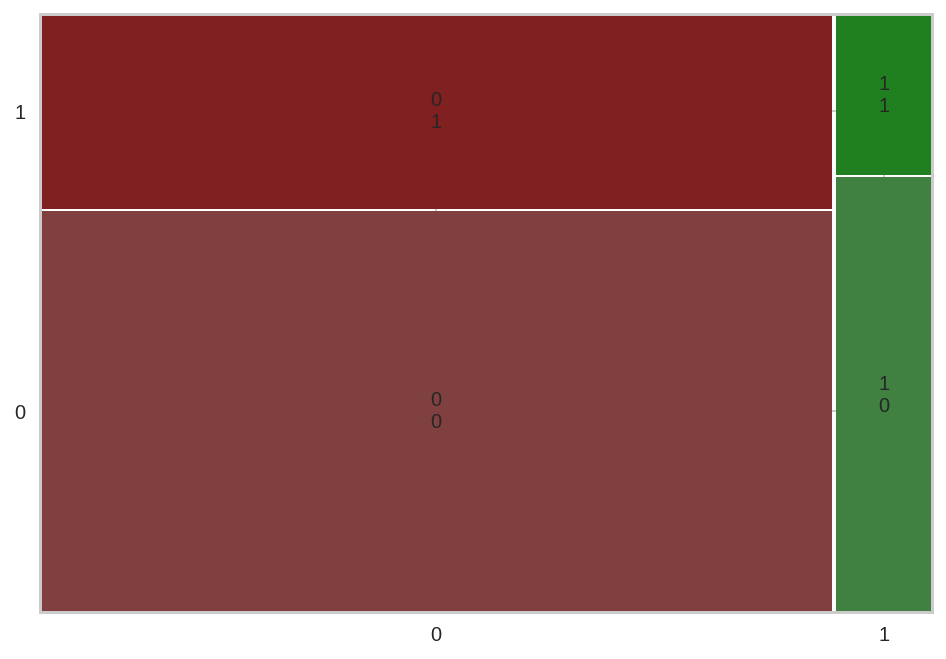

    Contingency table


Red_android,0,1
Red_apple,,
0,59843,29133
1,7884,2930


In [39]:
# contingency table
mosaic(df_vk_cleaned, ['Red_apple', 'Red_android'])
plt.show()

contingency_table = pd.crosstab(df_vk_cleaned['Red_apple'], df_vk_cleaned['Red_android'])
print(color.BOLD + '    Contingency table' + color.END)
contingency_table

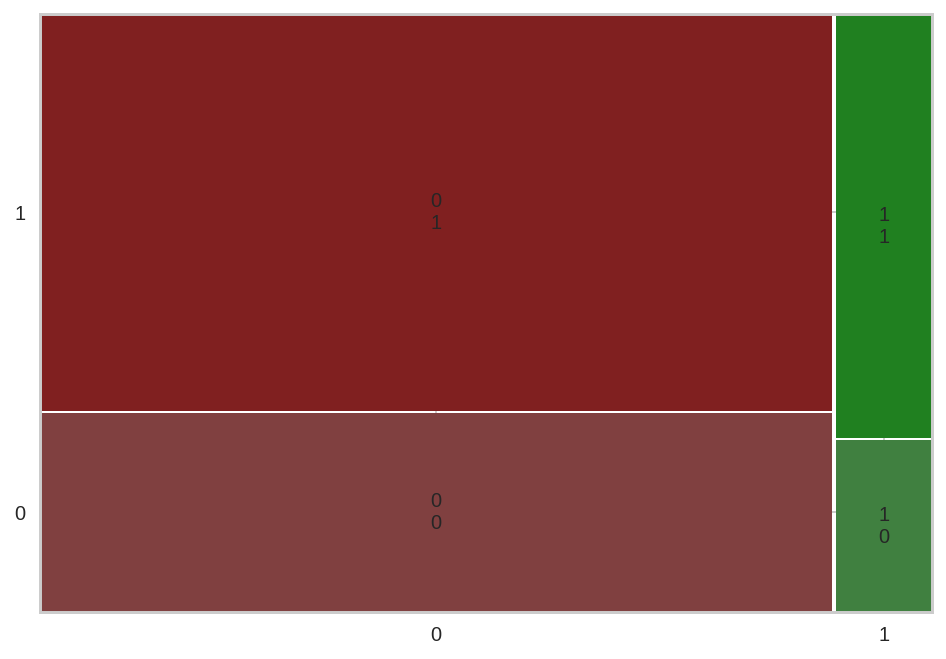

    Contingency table


Red_web,0,1
Red_apple,,
0,29717,59259
1,3109,7705


In [40]:
# contingency table
mosaic(df_vk_cleaned, ['Red_apple', 'Red_web'])
plt.show()

contingency_table = pd.crosstab(df_vk_cleaned['Red_apple'], df_vk_cleaned['Red_web'])
print(color.BOLD + '    Contingency table' + color.END)
contingency_table

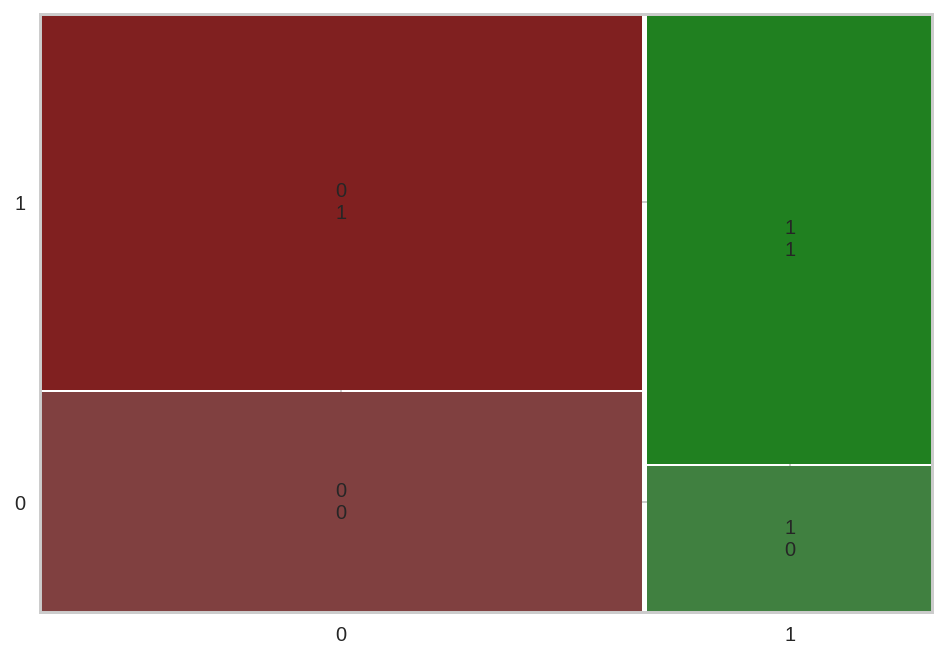

    Contingency table


Red_web,0,1
Red_android,,
0,24970,42757
1,7856,24207


In [41]:
# contingency table
mosaic(df_vk_cleaned, ['Red_android', 'Red_web'])
plt.show()

contingency_table = pd.crosstab(df_vk_cleaned['Red_android'], df_vk_cleaned['Red_web'])
print(color.BOLD + '    Contingency table' + color.END)
contingency_table

## 4. CLUSTERING

В данном разделе я провожу процедуру кластеринга для каждой отдельной компании, для всех компаний представлены небольшие рекомендации на основе анализа. *Делать кластеризацию для всего датасета не имеет смысла, так как он включает в себя информацию сразу о всех компаниях и все кластеры будут просто привязаны к определенной компании (на всякий случай, я сделал это, но данный анализ не дал какой-либо полезной информации).

red_cols
green_cols
black_cols
blue_cols

### Red Company (building of the model)

Создаем отдельный датасет для **Red** компании. Выкидываем все строчки, где мы имеем только нули, "is_msk" не является частью фильтра так как не является колонкой привязанной к конкретной компании.

In [42]:
df_whole = df_vk_cleaned[red_cols]
df_nonzero = df_whole[(df_whole.drop("is_msk", axis=1) != 0).any(axis=1)]

scaler = StandardScaler()
scaler.fit(df_nonzero)
scaled_df_nonzero = pd.DataFrame(scaler.transform(df_nonzero),columns= df_nonzero.columns )

Проводим PCA, чтобы сократить кол-во переменных и иметь возможность изобразить наши кластеры графически.

In [43]:
pca = PCA(n_components=3)
pca.fit(scaled_df_nonzero)
PCA_df_nonzero = pd.DataFrame(pca.transform(scaled_df_nonzero), columns=(["col1","col2", "col3"]))
x_non =PCA_df_nonzero["col1"]
y_non =PCA_df_nonzero["col2"]
z_non =PCA_df_nonzero["col3"]

PCA_df_nonzero

,col1,col2,col3
0,-0.423688,-0.081559,-0.922079
1,1.891684,2.151014,-0.077974
2,-1.651390,-0.135846,0.399810
3,1.891684,2.151014,-0.077974
4,-0.423688,-0.081559,-0.922079
...,...,...,...
81100,-1.636759,1.429075,1.799441
81101,0.686852,-1.085988,-0.507193
81102,0.988224,0.088281,0.577743
81103,-1.651390,-0.135846,0.399810


Определяем оптимальное число кластеров для наших данных и запускаем алгоритм, который отметит установленное число кластеров.

Elbow Method for PCA_df_nonzero


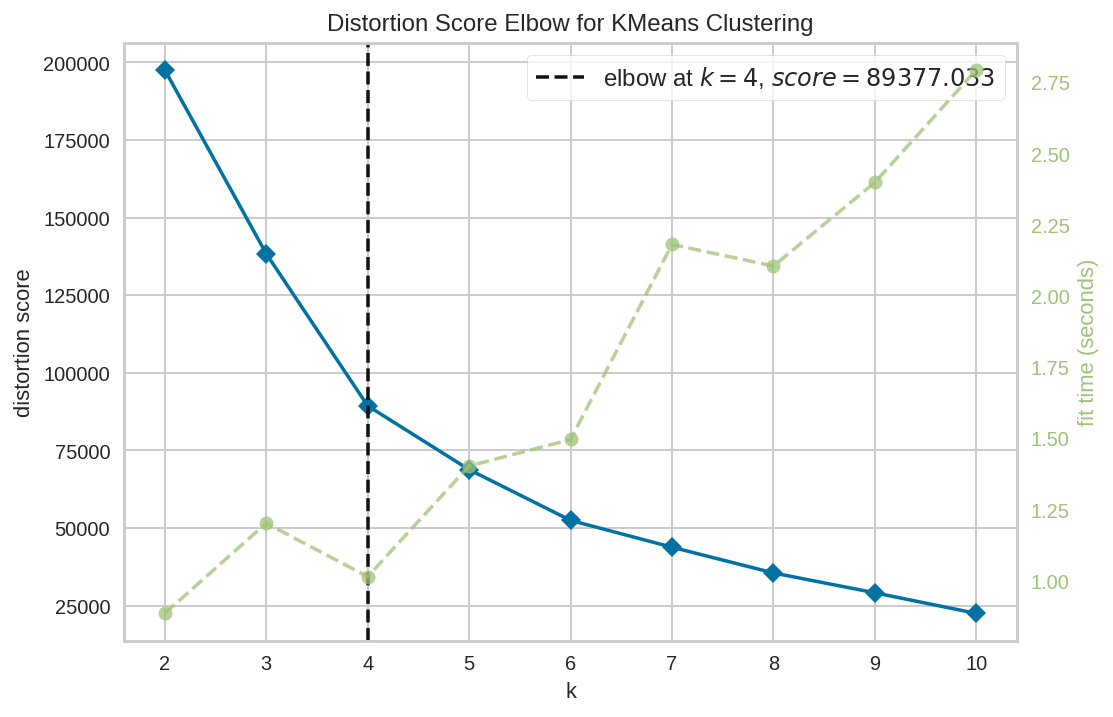

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [44]:
print('Elbow Method for PCA_df_nonzero')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_df_nonzero)
Elbow_M.show()

In [46]:
plot_colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]

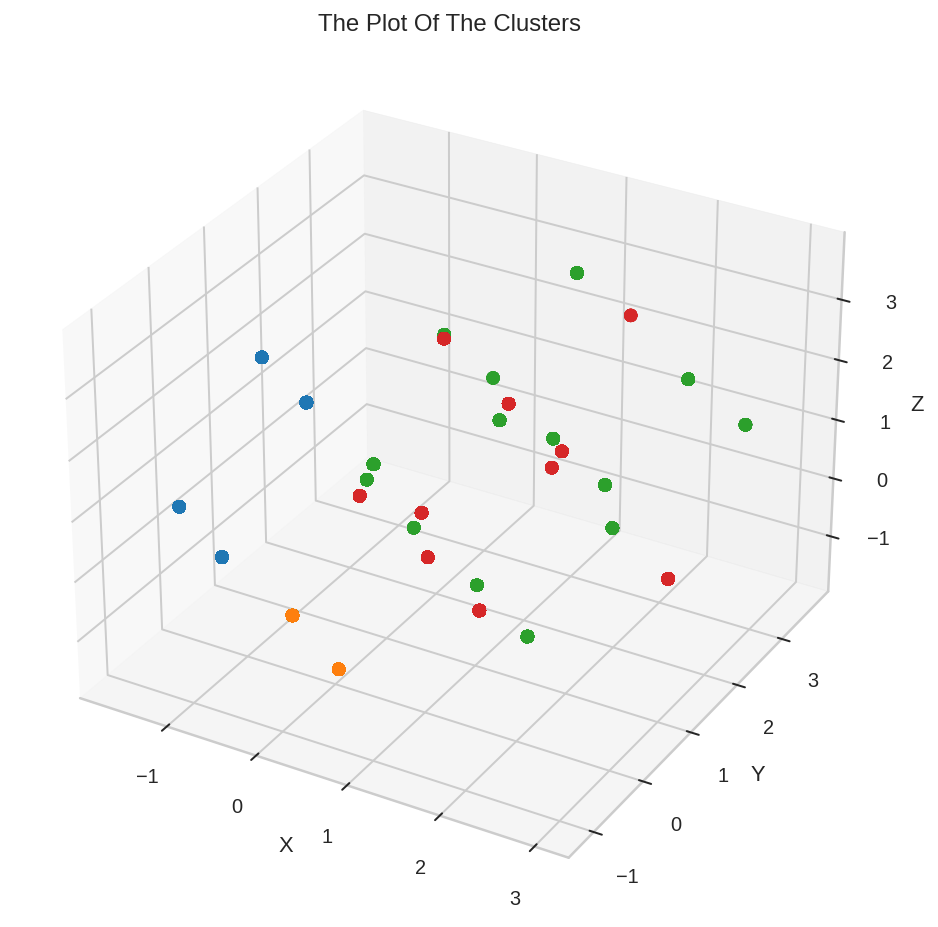

In [47]:
kmeans = KMeans(n_clusters=4)
cluster_kmeans = kmeans.fit_predict(PCA_df_nonzero)

PCA_df_nonzero["Clusters"] = cluster_kmeans
df_nonzero["Clusters"] = cluster_kmeans

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(x_non, y_non, z_non, s=40, c=np.array(plot_colors)[cluster_kmeans])
ax.set_title("The Plot Of The Clusters")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

### Red Company (evaluation & insigths)

In [48]:
def clust_review(dataframe, condition_column, end_value):
    
    pl = sns.countplot(x=df_nonzero["Clusters"], palette = plot_colors)
    pl.set_title("Distribution Of The Clusters")
    plt.show()
    print(color.BOLD+"MEAN VALUE FOR EACH FEATURE"+color.END)
    mean_values_dict = {}
    count_values_dict = {}
    for condition_value in range(end_value + 1):
        filtered_df = dataframe[dataframe[condition_column] == condition_value]
        mean_values = filtered_df.mean()
        mean_values_dict[condition_value] = mean_values
        count_values_dict[condition_value] = len(filtered_df)
    result_df = pd.DataFrame(mean_values_dict).transpose()
    result_df.index.name = condition_column
    result_df = result_df.drop(condition_column, axis=1)
    result_df['Size of the clusters'] = pd.Series(count_values_dict)
    result_df = result_df.round(3) 
    return result_df

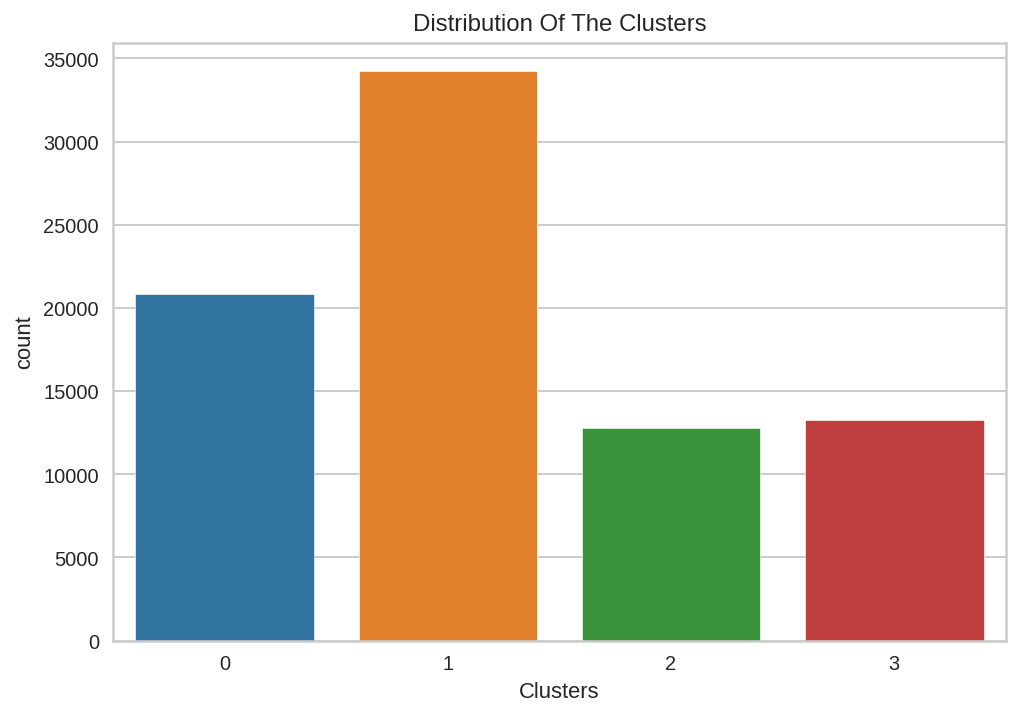

MEAN VALUE FOR EACH FEATURE


,has_Red_id,Red_android,Red_apple,Red_web,is_msk,Size of the clusters
Clusters,,,,,,
0,0.000,0.196,0.000,1.000,0.120,20824
1,1.000,0.466,0.000,1.000,0.000,34234
2,0.867,0.194,0.810,0.792,0.353,12790
3,0.786,0.721,0.034,0.134,0.218,13257


In [49]:
clust_review(df_nonzero, 'Clusters', 3)

### Green Company (building of the model)

Elbow Method for PCA_df_nonzero


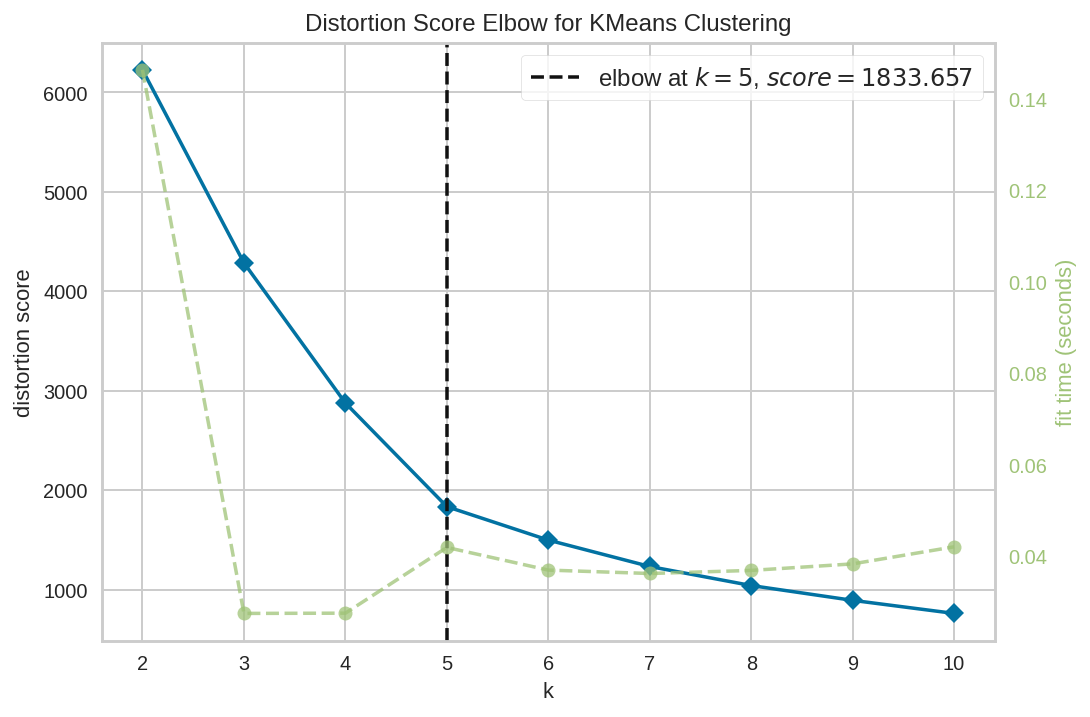

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [50]:
df_whole = df_vk_cleaned[green_cols]
df_nonzero = df_whole[(df_whole.drop("is_msk", axis=1) != 0).any(axis=1)]

scaler = StandardScaler()
scaler.fit(df_nonzero)
scaled_df_nonzero = pd.DataFrame(scaler.transform(df_nonzero),columns= df_nonzero.columns )

pca = PCA(n_components=3)
pca.fit(scaled_df_nonzero)
PCA_df_nonzero = pd.DataFrame(pca.transform(scaled_df_nonzero), columns=(["col1","col2", "col3"]))
x_non =PCA_df_nonzero["col1"]
y_non =PCA_df_nonzero["col2"]
z_non =PCA_df_nonzero["col3"]

print('Elbow Method for PCA_df_nonzero')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_df_nonzero)
Elbow_M.show()

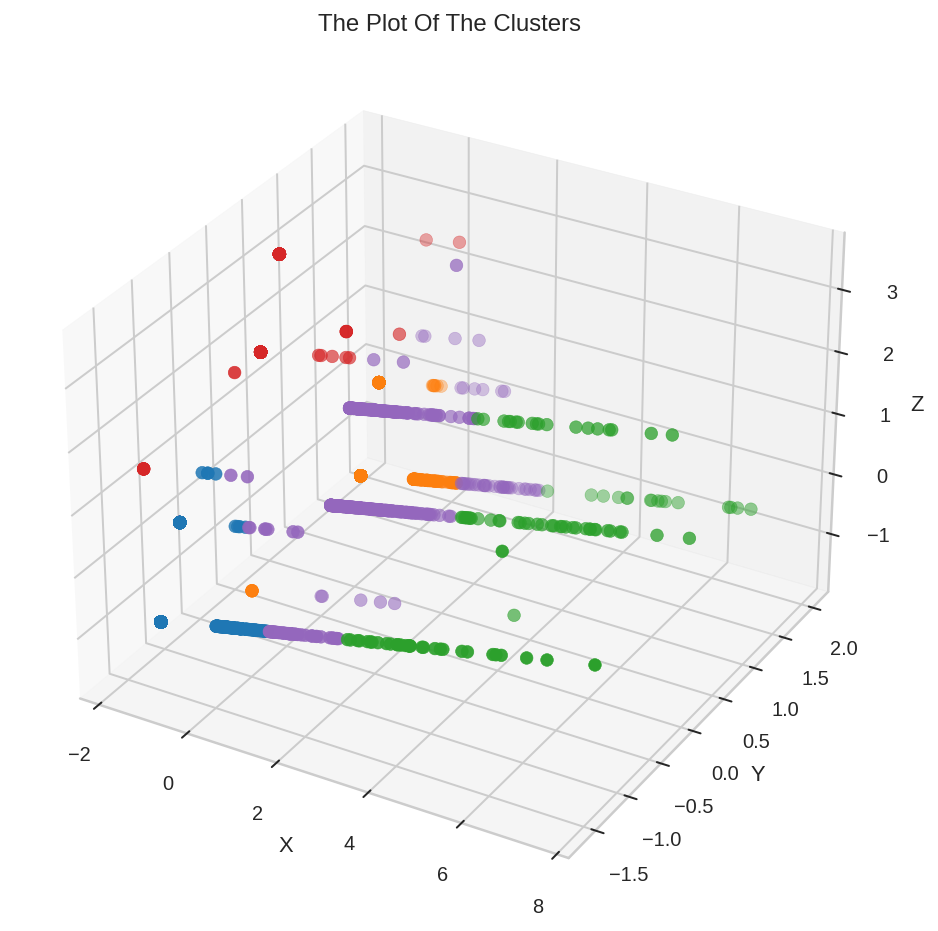

In [51]:
kmeans = KMeans(n_clusters=5)
cluster_kmeans = kmeans.fit_predict(PCA_df_nonzero)

PCA_df_nonzero["Clusters"] = cluster_kmeans
df_nonzero["Clusters"] = cluster_kmeans

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(x_non, y_non, z_non, s=40, c=np.array(plot_colors)[cluster_kmeans])
ax.set_title("The Plot Of The Clusters")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

### Green Company (evaluation & insigths)

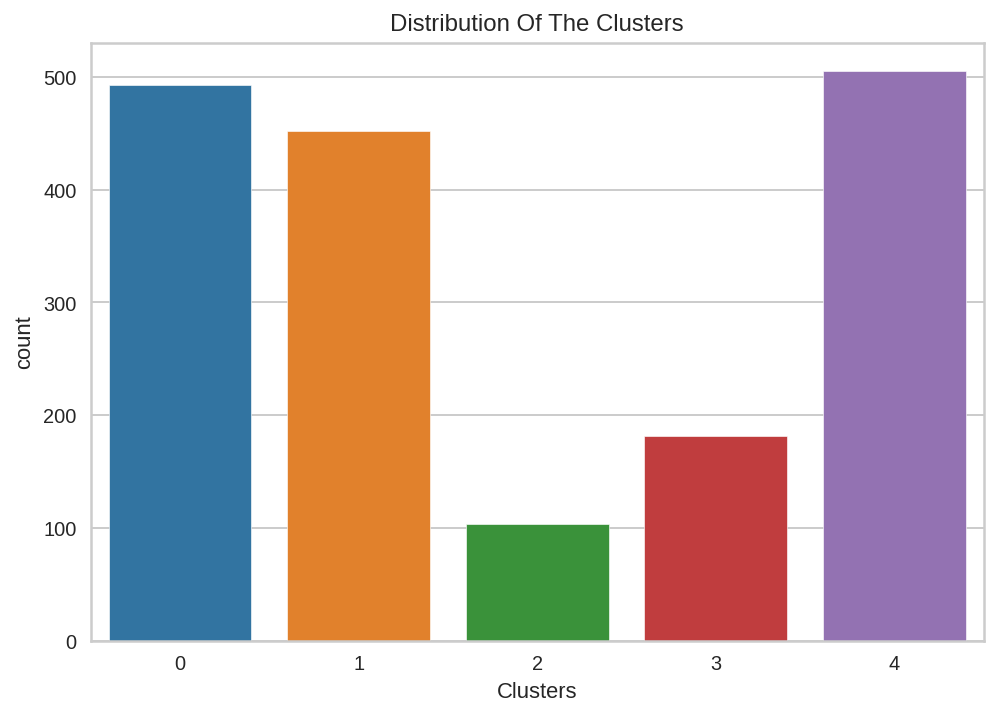

MEAN VALUE FOR EACH FEATURE


,has_Green_id,Green_gmv_total,Green_gmv_order_count,Green_android,Green_apple,Green_web,is_msk,Size of the clusters
Clusters,,,,,,,,
0,0.252,538.069,0.629,0.000,1.000,0.008,0.840,493
1,0.217,393.947,0.509,1.000,0.013,0.000,0.794,452
2,1.000,18582.097,23.320,0.165,0.320,0.000,0.816,103
3,0.055,111.061,0.127,0.072,0.039,1.000,0.691,181
4,1.000,3727.952,4.616,0.101,0.111,0.018,0.669,505


In [52]:
clust_review(df_nonzero, 'Clusters', 4)

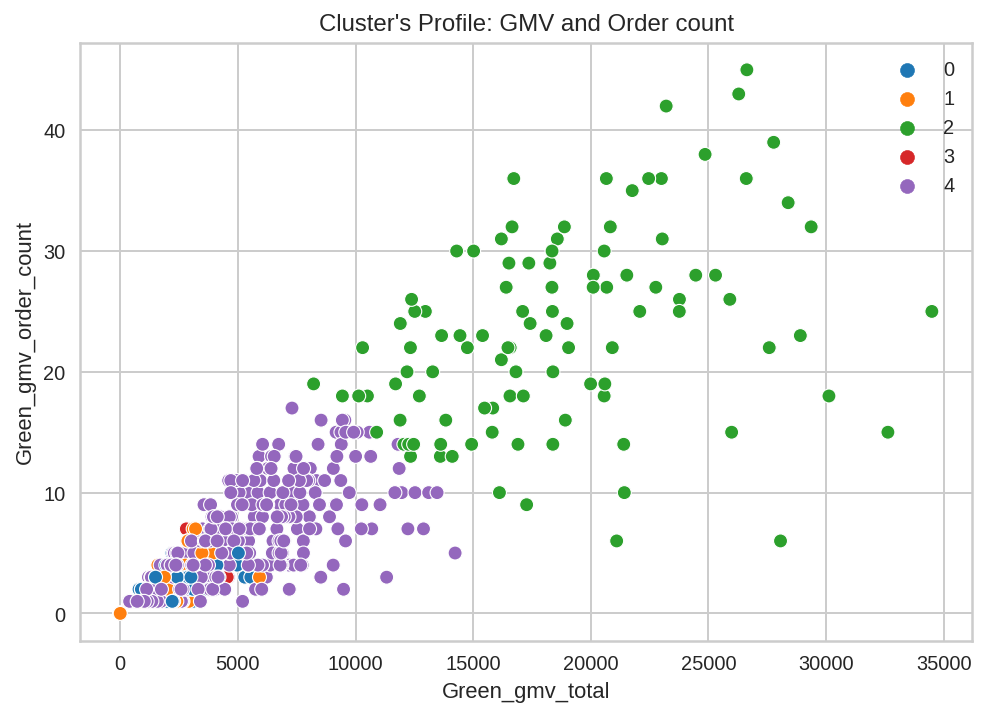

In [53]:
pl = sns.scatterplot(data = df_nonzero,x=df_nonzero["Green_gmv_total"], y=df_nonzero["Green_gmv_order_count"],hue=df_nonzero["Clusters"], palette = plot_colors)
pl.set_title("Cluster's Profile: GMV and Order count")
plt.legend()
plt.show()

### Black Company (building of the model)

Elbow Method for PCA_df_nonzero


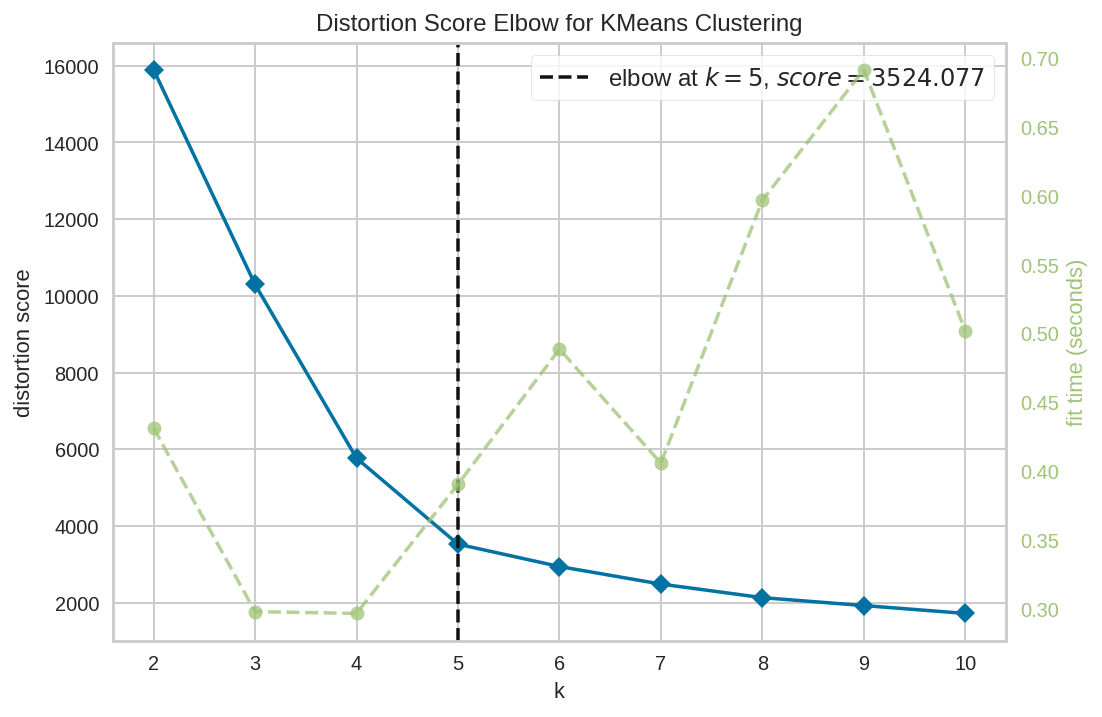

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [54]:
df_whole = df_vk_cleaned[black_cols]
df_nonzero = df_whole[(df_whole.drop("is_msk", axis=1) != 0).any(axis=1)]

scaler = StandardScaler()
scaler.fit(df_nonzero)
scaled_df_nonzero = pd.DataFrame(scaler.transform(df_nonzero),columns= df_nonzero.columns )

pca = PCA(n_components=3)
pca.fit(scaled_df_nonzero)
PCA_df_nonzero = pd.DataFrame(pca.transform(scaled_df_nonzero), columns=(["col1","col2", "col3"]))
x_non =PCA_df_nonzero["col1"]
y_non =PCA_df_nonzero["col2"]
z_non =PCA_df_nonzero["col3"]

print('Elbow Method for PCA_df_nonzero')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_df_nonzero)
Elbow_M.show()

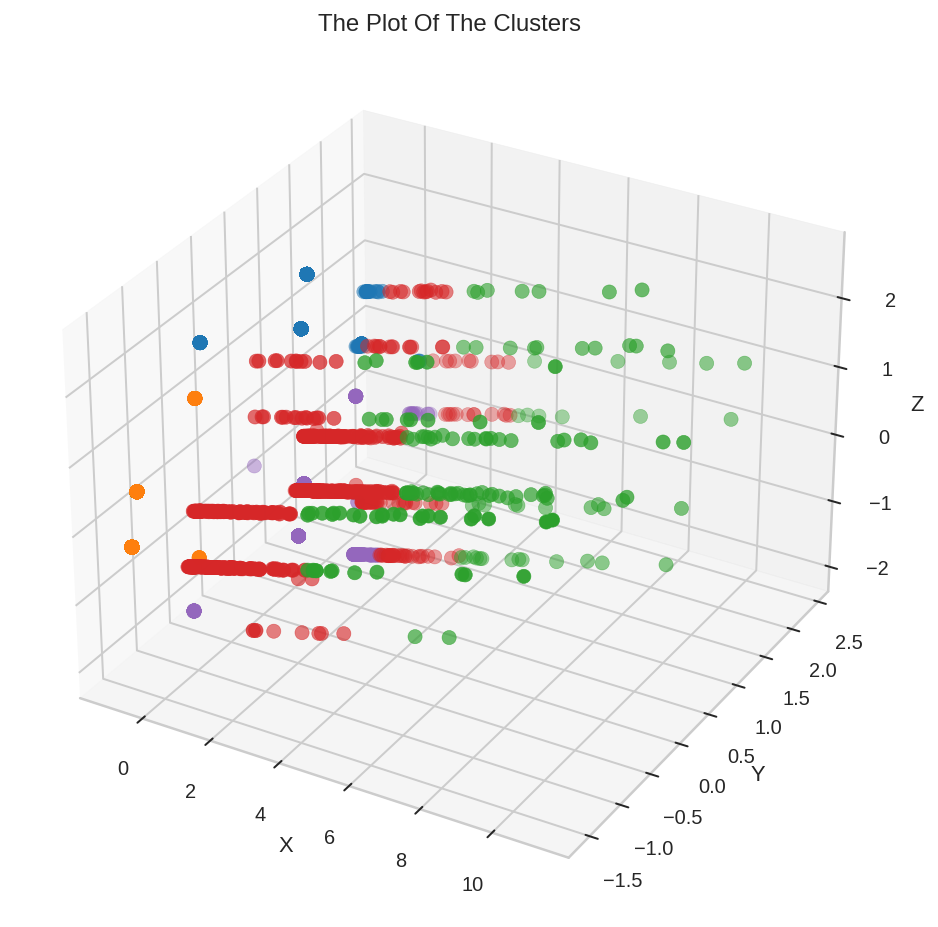

In [55]:
kmeans = KMeans(n_clusters=5)
cluster_kmeans = kmeans.fit_predict(PCA_df_nonzero)

PCA_df_nonzero["Clusters"] = cluster_kmeans
df_nonzero["Clusters"] = cluster_kmeans

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(x_non, y_non, z_non, s=50, c=np.array(plot_colors)[cluster_kmeans])
ax.set_title("The Plot Of The Clusters")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

### Black Company (evaluation & insigths)

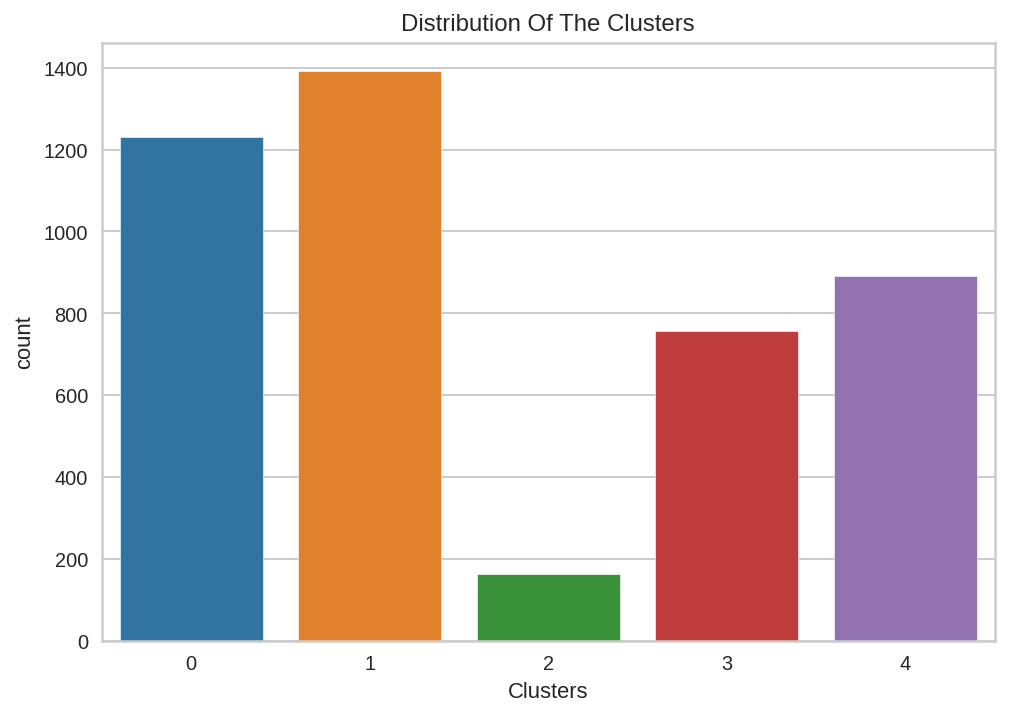

MEAN VALUE FOR EACH FEATURE


,has_Black_id,Black_gmv_total,Black_gmv_order_count,Black_android,Black_apple,Black_web,is_msk,Size of the clusters
Clusters,,,,,,,,
0,0.024,44.278,0.024,0.024,0.020,1.000,0.392,1232
1,0.000,0.000,0.000,0.004,1.000,0.030,0.296,1392
2,1.000,20494.284,9.395,0.222,0.315,0.259,0.451,162
3,1.000,4455.921,2.118,0.136,0.345,0.102,0.349,756
4,0.090,182.545,0.109,1.000,0.025,0.055,0.189,891


In [56]:
clust_review(df_nonzero, 'Clusters', 4)

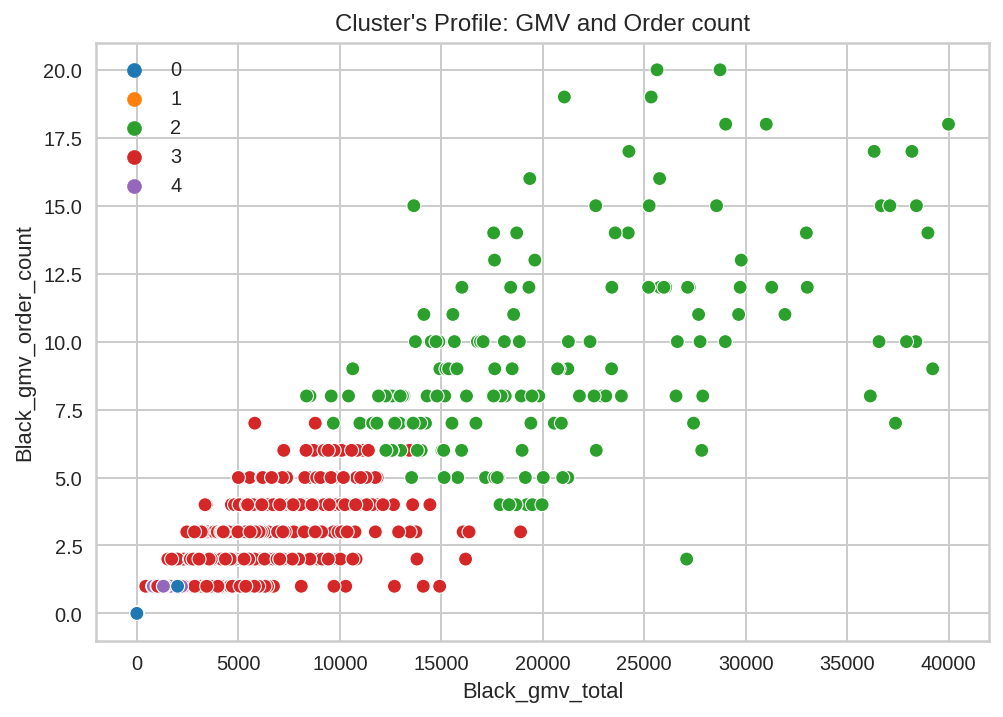

In [57]:
pl = sns.scatterplot(data = df_nonzero,x=df_nonzero["Black_gmv_total"], y=df_nonzero["Black_gmv_order_count"],hue=df_nonzero["Clusters"], palette = plot_colors)
pl.set_title("Cluster's Profile: GMV and Order count")
plt.legend()
plt.show()

### Blue Company (building of the model)

Elbow Method for PCA_df_nonzero


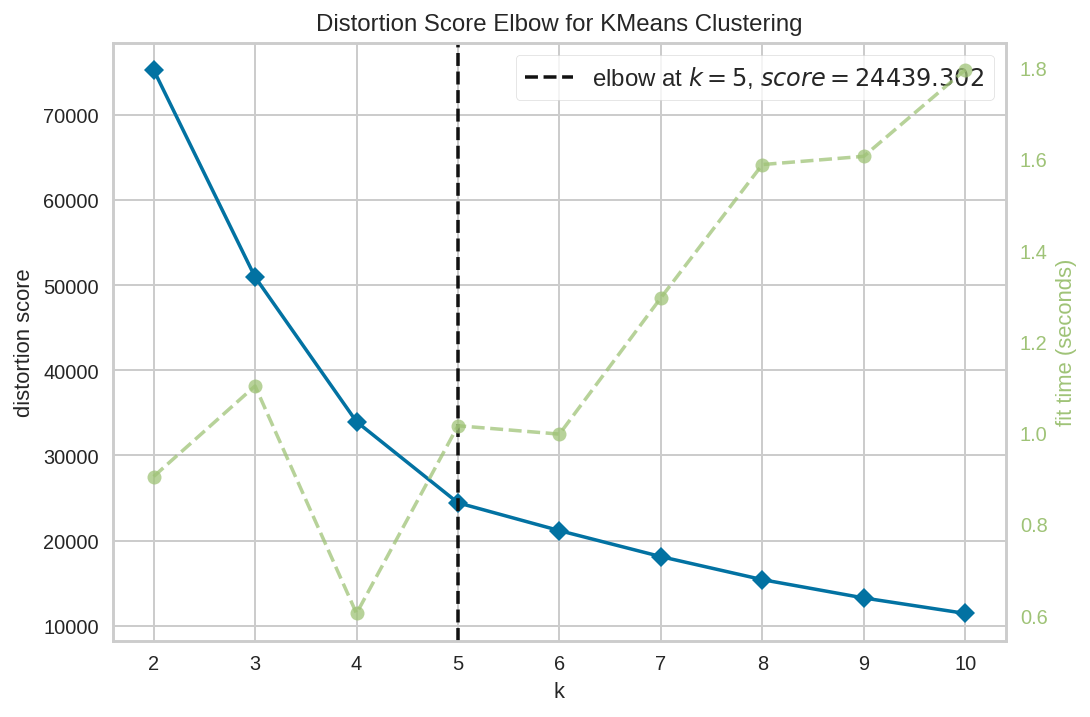

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [58]:
df_whole = df_vk_cleaned[blue_cols]
df_nonzero = df_whole[(df_whole.drop("is_msk", axis=1) != 0).any(axis=1)]

scaler = StandardScaler()
scaler.fit(df_nonzero)
scaled_df_nonzero = pd.DataFrame(scaler.transform(df_nonzero),columns= df_nonzero.columns )

pca = PCA(n_components=3)
pca.fit(scaled_df_nonzero)
PCA_df_nonzero = pd.DataFrame(pca.transform(scaled_df_nonzero), columns=(["col1","col2", "col3"]))
x_non =PCA_df_nonzero["col1"]
y_non =PCA_df_nonzero["col2"]
z_non =PCA_df_nonzero["col3"]

print('Elbow Method for PCA_df_nonzero')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_df_nonzero)
Elbow_M.show()

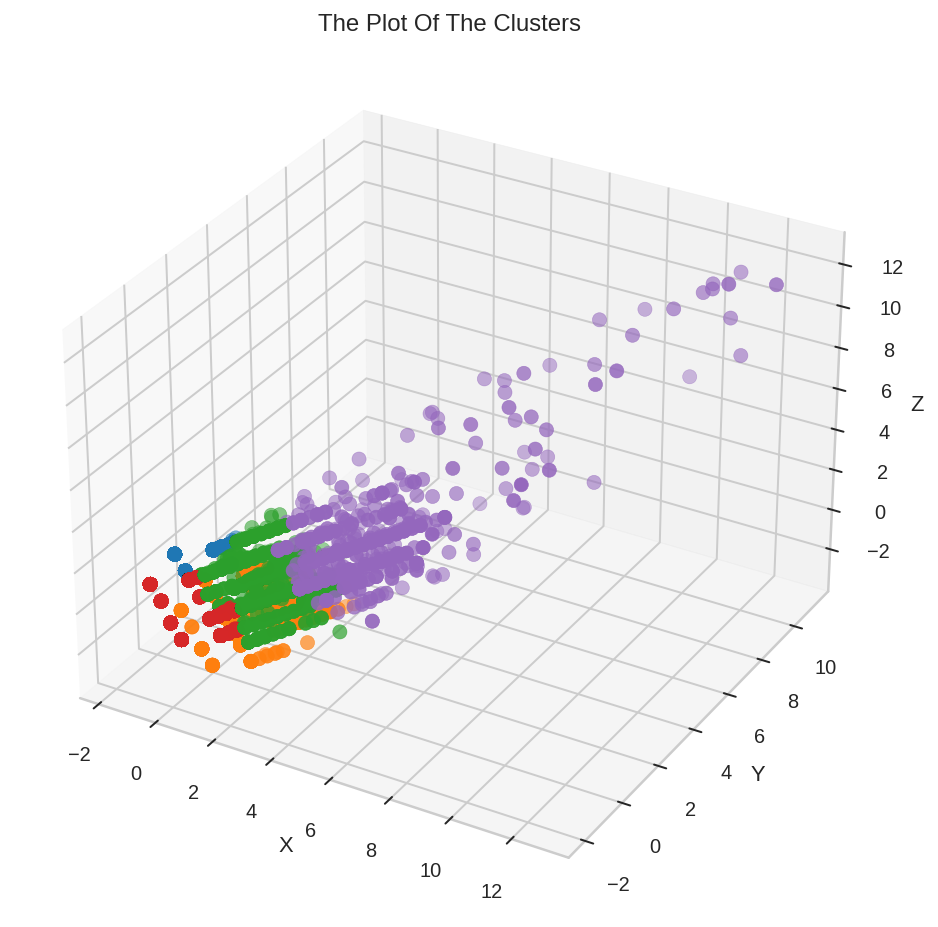

In [59]:
kmeans = KMeans(n_clusters=5)
cluster_kmeans = kmeans.fit_predict(PCA_df_nonzero)

PCA_df_nonzero["Clusters"] = cluster_kmeans
df_nonzero["Clusters"] = cluster_kmeans

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(x_non, y_non, z_non, s=50, c=np.array(plot_colors)[cluster_kmeans])
ax.set_title("The Plot Of The Clusters")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

### Black Company (evaluation & insigths)

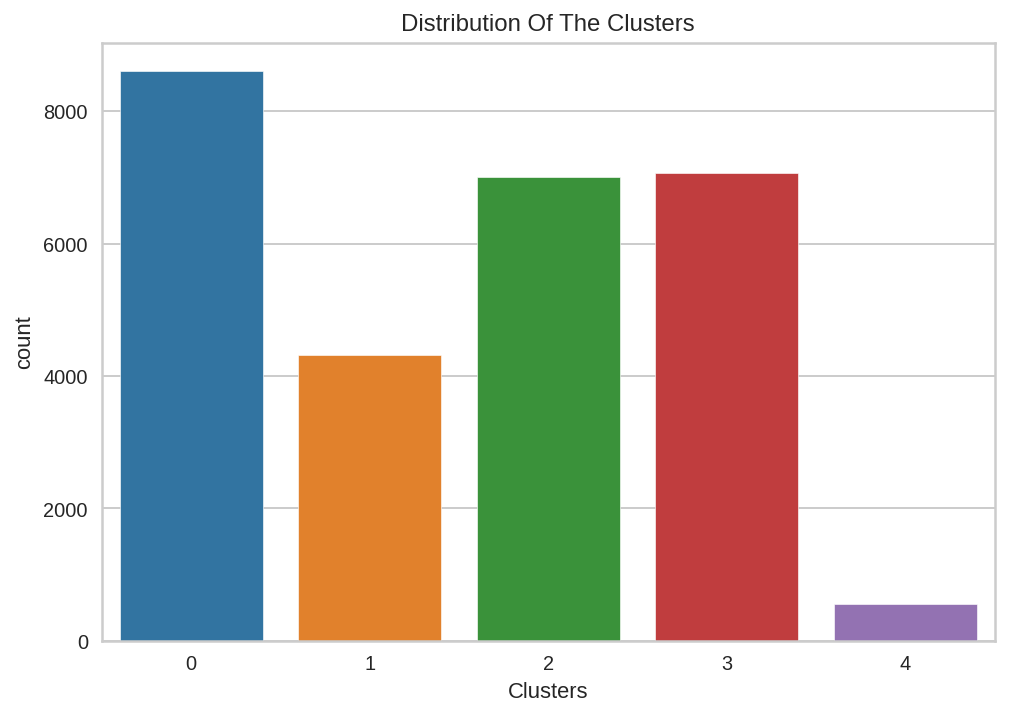

MEAN VALUE FOR EACH FEATURE


,has_Blue_id,Blue_activity_count,Blue_gmv_total,Blue_android,Blue_apple,Blue_web,is_msk,Size of the clusters
Clusters,,,,,,,,
0,0.212,0.038,0.025,0.000,0.000,1.000,0.144,8606
1,0.336,0.246,0.392,0.069,1.000,0.118,0.253,4311
2,1.000,0.897,2.427,0.068,0.025,0.054,0.143,7001
3,0.324,0.119,0.074,1.000,0.000,0.136,0.161,7068
4,1.000,13.114,200.605,0.279,0.202,0.256,0.181,559


In [60]:
clust_review(df_nonzero, 'Clusters', 4)

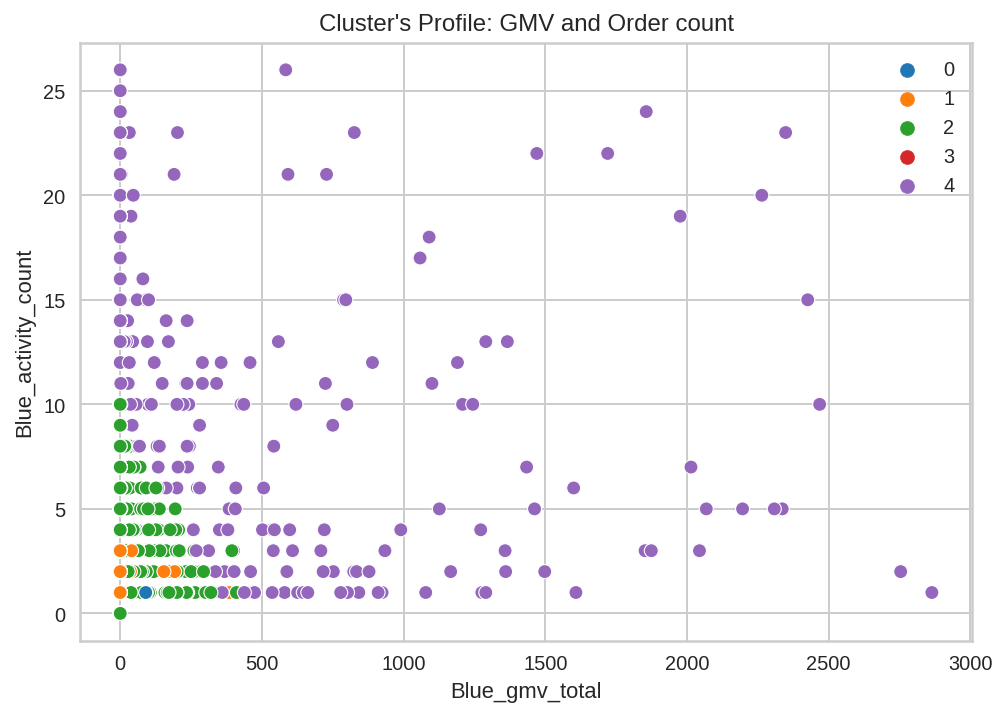

In [61]:
pl = sns.scatterplot(data = df_nonzero,x=df_nonzero["Blue_gmv_total"], y=df_nonzero["Blue_activity_count"],hue=df_nonzero["Clusters"], palette = plot_colors)
pl.set_title("Cluster's Profile: GMV and Order count")
plt.legend()
plt.show()